**Nombre: Alexis Hernández Martínez**

**Nombre: Norma de los Ángeles García López**

**Matrícula: A01016308**

**Matrícula: A01228278**

**Materia: Ciencia y Analítica de Datos**

**Profesor: Dra. María de la Paz Rico**

**Fecha: Domingo 13 Noviembre 2022**

Nombre de la Entrega: **Reto: Entrega 1: Limpieza, análisis, visualización y kmeans**



##**Limpieza, análisis, visualización y agrupamiento.**

En esta base de datos encontraras:

- Aguas subterráneas.
- Aguas superficiales.

Por lo que realizarás el mismo análisis en ambas bases de datos:

- Limpieza de base de datos.

Explorar  cada datos (auxiliate de describe(), mean(), plot, boxplot de pandas):
  - Identificando tendencias centrales promedio, media y mediana de los datos. 
  - Identificar medidas de dispersión, máximo, mínimo .
  - Identificar medidas de posición no centrales , los cuartiles , outliers.   
  - Identificar correlaciones.
  - Preparar los datos 

 - Realizar análisis para encontrar si existe una relación entre la calidad del agua y su ubicación geográfica a través de K- means.
 - Mostrar resultados de agrupamiento de latitudes y longitudes con K means en el mapa de México.

#**Importación e Instalación de Módulos Necesarios**



In [1]:
# En esta parte del código instalamos lo necesario para tener geopandas y poder hacer las gráficas de mapas

! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.7 MB 7.2 MB/s 
     |████████████████████████████████| 1.0 MB 45.8 MB/s 
     |████████████████████████████████| 1.7 MB 46.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 179 kB 56.1 MB/s 
     |████████████████████████████████| 6.3 MB 46.3 MB/s 
  Created wheel for qeds: filename=qeds-0.7.0-py3-none-any.whl size=27812 sha256=e81a0d129d3ec0831b1dda020d4bdb00bb998492f18e0e7fbf7f6562f12f7634
  Stored in directory: /root/.cache/pip/wheels/fc/8c/52/0cc036b9730b75850b9845770780f8d05ed08ff38a67cbaa29
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=81a55b3ce9ac4b1e649e24049b9f0e9c01a49f23010701e270552ae257ffabc4
  Stored in directory: /root/.

In [284]:
#Como base del ejercicio, se procede a cargar las librerias que se utilizarán

import pandas as pd
import numpy as np
import statistics as sts
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

from tqdm import tqdm
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas

import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

from yellowbrick.cluster import KElbowVisualizer
from sklearn.datasets import make_blobs
import math

In [3]:
# En esta parte se comunica el archivo con nuestro drive, para poder sacar los archivos de datos

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##**ARCHIVO 1: AGUAS SUPERFICIALES**

In [4]:
#En esta parte del código cargamos el archivo CSV con su respectivo encoding para que sea leído corrrectamente

df = pd.read_csv('/content/DF_Superficiales.csv', 
                 encoding='latin-1')
df

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,...,CONTAMINANTES,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO
0,DLAGU8,PRESA EL SAUCILLO 100M AGUAS ARRIBA DE LA CORTINA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,RIO SAN PEDRO,PRESA EL SAUCILLO,LENTICO,PRESA,-102.33911,...,"DQO,CF,",SI,NO,SI,NO,SI,ND,SI,SI,LENTICO
1,DLBAJ100,"LOS CABOS SEG 22, 2 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN JOSE DEL CABO,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.84290,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
2,DLBAJ101,"LOS CABOS SEG 22, 1 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.86442,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
3,DLBAJ102,LOS CABOS 3,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.88604,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
4,DLBAJ103,LOS CABOS 1,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.89657,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# En nuestra primer etapa de validación de información, decidimos primero ubicar las columnas con elementos vacios
# Todas las columnas presentan al menos un valor vacío

df.isnull().any()

CLAVE                     True
SITIO                     True
ORGANISMO_DE_CUENCA       True
ESTADO                    True
MUNICIPIO                 True
CUENCA                    True
CUERPO DE AGUA            True
TIPO                      True
SUBTIPO                   True
LONGITUD                  True
LATITUD                   True
PERIODO                   True
DBO_mg/L                  True
CALIDAD_DBO               True
DQO_mg/L                  True
CALIDAD_DQO               True
SST_mg/L                  True
CALIDAD_SST               True
COLI_FEC_NMP_100mL        True
CALIDAD_COLI_FEC          True
E_COLI_NMP_100mL          True
CALIDAD_E_COLI            True
ENTEROC_NMP_100mL         True
CALIDAD_ENTEROC           True
OD_PORC                   True
CALIDAD_OD_PORC           True
OD_PORC_SUP               True
CALIDAD_OD_PORC_SUP       True
OD_PORC_MED               True
CALIDAD_OD_PORC_MED       True
OD_PORC_FON               True
CALIDAD_OD_PORC_FON       True
TOX_D_48

In [6]:
# En el análisis de info, vemos que hay 4 columnas con todos sus valores en nulo, por lo que procederemos más adelante a retirarlas

# También vemos que la mayoría de los campos son de tipo objeto, por lo que al ser necesario, primero los cambios a string y luego a float para
# poder trabajar con ellos 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4141 entries, 0 to 4140
Data columns (total 55 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CLAVE                   3493 non-null   object 
 1   SITIO                   3493 non-null   object 
 2   ORGANISMO_DE_CUENCA     3493 non-null   object 
 3   ESTADO                  3493 non-null   object 
 4   MUNICIPIO               3493 non-null   object 
 5   CUENCA                  3492 non-null   object 
 6   CUERPO DE AGUA          3479 non-null   object 
 7   TIPO                    3493 non-null   object 
 8   SUBTIPO                 3479 non-null   object 
 9   LONGITUD                3493 non-null   float64
 10  LATITUD                 3493 non-null   float64
 11  PERIODO                 3493 non-null   float64
 12  DBO_mg/L                2581 non-null   object 
 13  CALIDAD_DBO             2581 non-null   object 
 14  DQO_mg/L                2581 non-null   

In [7]:
# Se hace un análisis de las columnas, todos los nombres tienen sentido

df.columns

Index(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
       'CUENCA', 'CUERPO DE AGUA', 'TIPO', 'SUBTIPO', 'LONGITUD', 'LATITUD',
       'PERIODO', 'DBO_mg/L', 'CALIDAD_DBO', 'DQO_mg/L', 'CALIDAD_DQO',
       'SST_mg/L', 'CALIDAD_SST', 'COLI_FEC_NMP_100mL', 'CALIDAD_COLI_FEC',
       'E_COLI_NMP_100mL', 'CALIDAD_E_COLI', 'ENTEROC_NMP_100mL',
       'CALIDAD_ENTEROC', 'OD_PORC', 'CALIDAD_OD_PORC', 'OD_PORC_SUP',
       'CALIDAD_OD_PORC_SUP', 'OD_PORC_MED', 'CALIDAD_OD_PORC_MED',
       'OD_PORC_FON', 'CALIDAD_OD_PORC_FON', 'TOX_D_48_UT', 'CALIDAD_TOX_D_48',
       'TOX_V_15_UT', 'CALIDAD_TOX_V_15', 'TOX_D_48_SUP_UT',
       'CALIDAD TOX_D_48_SUP', 'TOX_D_48_FON_UT', 'CALIDAD_TOX_D_48_FON',
       'TOX_FIS_SUP_15_UT', 'CALIDAD_TOX_FIS_SUP_15', 'TOX_FIS_FON_15_UT',
       'CALIDAD_TOX_FIS_FON_15', 'SEMAFORO', 'CONTAMINANTES', 'CUMPLE_CON_DBO',
       'CUMPLE_CON_DQO', 'CUMPLE_CON_SST', 'CUMPLE_CON_CF',
       'CUMPLE_CON_E_COLI', 'CUMPLE_CON_ENTEROC', 'CUMPLE_CON_OD',
  

In [9]:
# En esta parte del código, dividiremos el dataframe en 3, tomando como base si el semáforo es Verde, Rojo o Amarillo
# Esto se hace con el fin de sacar media, moda, mediana (lo que aplique) con valores agrupados de la salida correspondiente

df_verde = pd.DataFrame(df[df['SEMAFORO'] == 'Verde'])
df_rojo = pd.DataFrame(df[df['SEMAFORO'] == 'Rojo'])
df_amarillo = pd.DataFrame(df[df['SEMAFORO'] == 'Amarillo'])


In [10]:
df_verde

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,...,CONTAMINANTES,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO
1,DLBAJ100,"LOS CABOS SEG 22, 2 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN JOSE DEL CABO,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.84290,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
2,DLBAJ101,"LOS CABOS SEG 22, 1 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.86442,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
3,DLBAJ102,LOS CABOS 3,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.88604,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
4,DLBAJ103,LOS CABOS 1,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.89657,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
5,DLBAJ104,BAHIA CABO SAN LUCAS,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.90250,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3455,OCRBR5119M1,LAGUNA MADRE HUMEDAL 6,RIO BRAVO,TAMAULIPAS,MATAMOROS,LAGUNA MADRE NORTE,LAGUNA MADRE,COSTERO (HUMEDAL),LAGUNA,-97.46439,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
3456,OCRBR5120M1,LAGUNA MADRE HUMEDAL 7,RIO BRAVO,TAMAULIPAS,MATAMOROS,LAGUNA MADRE NORTE,LAGUNA MADRE,COSTERO (HUMEDAL),LAGUNA,-97.47659,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
3480,OCRBR5183M1,"SITIO 1, CANAL DE LLAMADA TOMA NORTE MUESTRA S...",RIO BRAVO,TAMAULIPAS,MIGUEL ALEMAN,RIO SAN JUAN 3,PRESA MARTE R. GOMEZ,LENTICO (HUMEDAL),PRESA,-98.95864,...,NaN,SI,SI,SI,SI,SI,ND,SI,SI,LENTICO
3486,OCRBR5202M1,PRESA INTERNACIONAL FALCON 6,RIO BRAVO,TAMAULIPAS,GUERRERO,RIO BRAVO 11,PRESA INTERNACIONAL FALCON,LENTICO (HUMEDAL),PRESA,-99.24931,...,NaN,SI,SI,SI,SI,SI,ND,SI,SI,LENTICO


In [11]:
df_rojo


,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,...,CONTAMINANTES,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO
0,DLAGU8,PRESA EL SAUCILLO 100M AGUAS ARRIBA DE LA CORTINA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,RIO SAN PEDRO,PRESA EL SAUCILLO,LENTICO,PRESA,-102.33911,...,"DQO,CF,",SI,NO,SI,NO,SI,ND,SI,SI,LENTICO
7,DLBAJ106W2,LAGUNA TODOS SANTOS - CENTRO DE LA LAGUNA,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,TODOS SANTOS,COSTERO,LAGUNA,-110.23902,...,"ENT_FEC,OD%F,",ND,ND,SI,ND,ND,NO,NO,SI,COSTERO
35,DLBAJ160,"PLAYA SANTA ROSALIA SEG23, 1 ISA8A",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,MULEGE,SANTA ROSALIA,GOLFO DE CALIFORNIA,COSTERO,OCEANO-MAR,-112.26933,...,"ENT_FEC,",ND,ND,SI,ND,ND,NO,SI,SI,COSTERO
58,DLBAJ194,RIO LA PURISIMA 2,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,COMONDU,MEZQUITAL SECO,RIO LA PURISIMA,LOTICO (HUMEDAL),ARROYO,-112.12748,...,"DQO,CF,",SI,NO,SI,NO,SI,ND,ND,SI,LOTICO
59,DLBAJ195,BAHIA MAGDALENA (PUERTO ADOLFO LOPEZ MATEOS),PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,COMONDU,LA PURISIMA,BAHIA MAGDALENA,COSTERO,BAHIA,-112.12343,...,"ENT_FEC,",ND,ND,SI,ND,ND,NO,SI,SI,COSTERO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3479,OCRBR5149M2,LAGUNA LA ESCONDIDA (ENTRADA),RIO BRAVO,TAMAULIPAS,REYNOSA,RIO BRAVO 13,LAGUNA LA ESCONDIDA,LENTICO,LAGUNA,-98.28476,...,"DBO,DQO,CF,",NO,NO,SI,NO,SI,ND,SI,SI,LENTICO
3481,OCRBR5191M1,"SITIO 5, CANAL DE LLAMADA TOMA SUR MUESTRA SUP...",RIO BRAVO,TAMAULIPAS,CAMARGO,RIO SAN JUAN 3,PRESA MARTE R. GOMEZ,LENTICO (HUMEDAL),PRESA,-98.92999,...,"DQO,",SI,NO,SI,SI,SI,ND,SI,SI,LENTICO
3483,OCRBR5194M2,LAGUNA LA ESCONDIDA AL NORTE DEL CENTRO CULTUR...,RIO BRAVO,TAMAULIPAS,REYNOSA,RIO BRAVO 13,LAGUNA LA ESCONDIDA,LENTICO,LAGUNA,-98.27113,...,"DQO,CF,E_COLI,",SI,NO,SI,NO,NO,ND,SI,SI,LENTICO
3489,OCRBR5207M1,EL LAGUITO,RIO BRAVO,TAMAULIPAS,NUEVO LAREDO,RIO BRAVO 11,EL LAGUITO,LENTICO,LAGO,-99.53064,...,"DBO,DQO,CF,",NO,NO,SI,NO,SI,ND,SI,SI,LENTICO


In [12]:
df_amarillo

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,...,CONTAMINANTES,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO
8,DLBAJ109,MANANTIAL SAN REGIS,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,TODOS SANTOS,LOTICO,ARROYO,-110.22379,...,"CF,",SI,SI,SI,NO,SI,ND,SI,SI,LOTICO
9,DLBAJ112,AGUA CALIENTE II,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SANTIAGO,SANTIAGO,LOTICO,ARROYO,-109.80786,...,"OD%L,",SI,SI,SI,SI,SI,ND,NO,SI,LOTICO
10,DLBAJ120M1,BOCA DE LA SIERRA,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN JOSE DEL CABO,SAN JOSE DEL CABO,LOTICO (HUMEDAL),ARROYO,-109.82610,...,"CF,",SI,SI,SI,NO,SI,ND,SI,SI,LOTICO
11,DLBAJ121,HUMEDAL OASIS DE LA SIERRA EL PILAR 1,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,LAS POCITAS-SAN HILARIO,HUMEDAL OASIS DE LA SIERRA EL PILAR 1,LOTICO (HUMEDAL),ARROYO,-110.95153,...,"CF,OD%L,",SI,SI,SI,NO,SI,ND,NO,SI,LOTICO
13,DLBAJ124,MANANTIAL CADUAÑO,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN JOSE DEL CABO,SAN JOSE DEL CABO,LOTICO (HUMEDAL),CANAL,-109.77912,...,"CF,E_COLI,",SI,SI,SI,NO,NO,ND,ND,SI,LOTICO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3484,OCRBR5195M1,RIO ALAMO PUENTE CARRETERO,RIO BRAVO,TAMAULIPAS,MIER,RIO ALAMO,RIO ALAMO,LOTICO,RIO,-99.15277,...,"CF,E_COLI,",SI,SI,SI,NO,NO,ND,SI,SI,LOTICO
3485,OCRBR5196M1,100 M AGUAS ABAJO DE LA PRESA FALCON,RIO BRAVO,TAMAULIPAS,GUERRERO,RIO BRAVO 12,RIO BRAVO,LOTICO,RIO,-99.17006,...,"CF,E_COLI,",SI,SI,SI,NO,NO,ND,SI,SI,LOTICO
3488,OCRBR5206M1,RIO SALADO PUENTE CARRETERO,RIO BRAVO,TAMAULIPAS,GUERRERO,RIO BRAVO 11,RIO SALADO,LOTICO,RIO,-99.42142,...,"CF,E_COLI,",SI,SI,SI,NO,NO,ND,SI,SI,LOTICO
3491,OCRBR5209M1,RIO BRAVO FRENTE A COMAPA,RIO BRAVO,TAMAULIPAS,NUEVO LAREDO,RIO BRAVO 10,RIO BRAVO,LOTICO,RIO,-99.52221,...,"CF,",SI,SI,SI,NO,SI,ND,SI,SI,LOTICO


In [13]:
# En esta parte del código, definimos los arrays con los que vamos a estar haciendo el relleno de la información

# Crear estas variables es importante porque nos va a permitir hacer ciclos for por donde podemos pasar por cada uno de los campos

NumericasQuimicas = ['DBO_mg/L','DQO_mg/L','SST_mg/L','COLI_FEC_NMP_100mL','E_COLI_NMP_100mL','ENTEROC_NMP_100mL','OD_PORC','OD_PORC_SUP','OD_PORC_MED',
             'OD_PORC_FON','TOX_D_48_UT','TOX_V_15_UT','TOX_D_48_SUP_UT','TOX_D_48_FON_UT','TOX_FIS_SUP_15_UT','TOX_FIS_FON_15_UT']

CategoriasQuimicas = ['CALIDAD_DBO','CALIDAD_DQO','CALIDAD_SST','CALIDAD_COLI_FEC','CALIDAD_E_COLI','CALIDAD_ENTEROC','CALIDAD_OD_PORC','CALIDAD_OD_PORC_SUP','CALIDAD_OD_PORC_MED',
             'CALIDAD_OD_PORC_FON','CALIDAD_TOX_D_48','CALIDAD_TOX_V_15','CALIDAD TOX_D_48_SUP','CALIDAD_TOX_D_48_FON','CALIDAD_TOX_FIS_SUP_15','CALIDAD_TOX_FIS_FON_15']

CategoricasCumplimiento = ['CUMPLE_CON_DBO','CUMPLE_CON_DQO','CUMPLE_CON_SST','CUMPLE_CON_CF','CUMPLE_CON_E_COLI', 'CUMPLE_CON_ENTEROC','CUMPLE_CON_OD','CUMPLE_CON_TOX']


# En esta parte del código comenzamos la limpieza de los datos, muchos de los campos que deberían ser numéricos son de tipo objeto pues traen el 
# símbolo menor que (<), por lo que procedemos a quitarlo, y en su lugar, decidimos mantener el límite superior de esa medición, es decir 
# el número que acompaña al símbolo. Una vez hecho esto, calculamos el promedio de cada uno de los campos, y lo asignamos a los valores NaN que tenga

# Al partir el dataframe original en 3 pedazos, este proceso se debe de realizar 3 veces, finalmente imprimimos el valor de los promedios para cada 
# uno de los dataframes y cada uno de los valores, y creamos 3 listas diferentes para guardar los valores de cada campo

promedios_verdes = list()
promedios_rojos = list()
promedios_amarillos = list()
nombres = list()

for name in NumericasQuimicas:
  df_verde[name]=  df_verde[name].astype('str')
  df_verde[name] = df_verde[name].str.replace('<1','1') 
  df_verde[name] = df_verde[name].str.replace('<2','2') 
  df_verde[name] = df_verde[name].str.replace('<3','3') 
  df_verde[name] = df_verde[name].str.replace('<10','10') 
  df_verde[name]= df_verde[name].astype('float')
  mean1 = df_verde[name].mean()
  df_verde[name] = df_verde[name].replace(np.nan,mean1)
  print("Promedio Verde ",name,mean1)
  promedios_verdes.append(mean1)
  nombres.append(name)
print("\n")


for name in NumericasQuimicas:
  df_rojo[name]= df_rojo[name].astype('str')
  df_rojo[name] = df_rojo[name].str.replace('<1','1') 
  df_rojo[name] = df_rojo[name].str.replace('<2','2') 
  df_rojo[name] = df_rojo[name].str.replace('<3','3') 
  df_rojo[name] = df_rojo[name].str.replace('<10','10') 
  df_rojo[name]= df_rojo[name].astype('float')
  mean2 = df_rojo[name].mean()
  df_rojo[name] = df_rojo[name].replace(np.nan,mean2)
  print("Promedio Rojo ",name,mean2)
  promedios_rojos.append(mean2)

print("\n")
    
for name in NumericasQuimicas:
  df_amarillo[name]= df_amarillo[name].astype('str')
  df_amarillo[name] = df_amarillo[name].str.replace('<1','1') 
  df_amarillo[name] = df_amarillo[name].str.replace('<2','2') 
  df_amarillo[name] = df_amarillo[name].str.replace('<3','3') 
  df_amarillo[name] = df_amarillo[name].str.replace('<10','10') 
  df_amarillo[name]= df_amarillo[name].astype('float')
  mean3 = df_amarillo[name].mean()
  df_amarillo[name] = df_amarillo[name].replace(np.nan,mean3)
  print("Promedio Amarillo ",name,mean3)
  promedios_amarillos.append(mean3)



16
Promedio Verde  DBO_mg/L 3.37219152854512
Promedio Verde  DQO_mg/L 18.24123020257827
Promedio Verde  SST_mg/L 24.81005595895817
Promedio Verde  COLI_FEC_NMP_100mL 281.20588235294116
Promedio Verde  E_COLI_NMP_100mL 91.06985294117646
Promedio Verde  ENTEROC_NMP_100mL 18.5822625698324
Promedio Verde  OD_PORC 75.42557251908397
Promedio Verde  OD_PORC_SUP 82.64989604989606
Promedio Verde  OD_PORC_MED 78.64151624548737
Promedio Verde  OD_PORC_FON 74.51757679180888
Promedio Verde  TOX_D_48_UT 1.0065131086142323
Promedio Verde  TOX_V_15_UT 1.0092097378277154
Promedio Verde  TOX_D_48_SUP_UT 1.0112635379061372
Promedio Verde  TOX_D_48_FON_UT nan
Promedio Verde  TOX_FIS_SUP_15_UT 1.0
Promedio Verde  TOX_FIS_FON_15_UT nan


Promedio Rojo  DBO_mg/L 40.03094882729211
Promedio Rojo  DQO_mg/L 144.5939893390192
Promedio Rojo  SST_mg/L 201.45195114995397
Promedio Rojo  COLI_FEC_NMP_100mL 249035.3272921109
Promedio Rojo  E_COLI_NMP_100mL 210243.79104477612
Promedio Rojo  ENTEROC_NMP_100mL 6324.796078

In [15]:
# En esta parte del código, vamos a agregar a nuestra lista de valores promedio, tanto la valoración de cada una de las mediciones
# Es decir, comparar el valor del promedio con la Valoración que viene en el archivo Escalas_superficial.csv, y le asignaremos 
# directamente su calificación. Finalmente le agregaremos el campo de su correspondiente columna de formato texto, con el objetivo de que este campo
# sea el match entre la lista de valores promedio y el dataframe correspondiente, y así poder llenar los valores nulos de Valoración

# En esta parte del código hacemos la asignación para el dataframe verde

b=0
super_list =list()
super_list2 = list()
super_list3 = list()

for name in NumericasQuimicas: 
 super_list.append([promedios_verdes[b],nombres[b]])
 b=b+1

valores_verdes = ['Buena Calidad','Buena Calidad','Excelente','Aceptable','Excelente','Excelente','Excelente','Excelente','Excelente',
             'Excelente','Toxicidad Baja','Toxicidad Baja','Toxicidad Baja','NaN','Toxicidad Baja','NaN']


df_promediosverdes = pd.DataFrame (super_list, columns = ['Valores Promedio Verdes','Nombres'])
df_promediosverdes['Valoración'] = valores_verdes
df_promediosverdes['Categorías Quimicas'] = CategoriasQuimicas
df_promediosverdes

,Valores Promedio Verdes,Nombres,Valoración,Categorías Quimicas
0,3.372192,DBO_mg/L,Buena Calidad,CALIDAD_DBO
1,18.241230,DQO_mg/L,Buena Calidad,CALIDAD_DQO
2,24.810056,SST_mg/L,Excelente,CALIDAD_SST
3,281.205882,COLI_FEC_NMP_100mL,Aceptable,CALIDAD_COLI_FEC
4,91.069853,E_COLI_NMP_100mL,Excelente,CALIDAD_E_COLI
5,18.582263,ENTEROC_NMP_100mL,Excelente,CALIDAD_ENTEROC
6,75.425573,OD_PORC,Excelente,CALIDAD_OD_PORC
7,82.649896,OD_PORC_SUP,Excelente,CALIDAD_OD_PORC_SUP
8,78.641516,OD_PORC_MED,Excelente,CALIDAD_OD_PORC_MED
9,74.517577,OD_PORC_FON,Excelente,CALIDAD_OD_PORC_FON


In [16]:
# En esta parte del código hacemos la asignación para el dataframe amarillo


b=0
for name in NumericasQuimicas: 
 super_list2.append([promedios_amarillos[b],nombres[b]])
 b=b+1
    
valores_amarillos = ['Buena Calidad','Buena Calidad','Aceptable','Fuertemente contaminada','Fuertemente contaminada','Excelente','Excelente','Excelente','Buena Calidad','Buena Calidad',
             'Toxicidad Baja','Toxicidad Baja','Toxicidad Baja','NaN','Toxicidad Baja','NaN']

df_promediosamarillos = pd.DataFrame (super_list2, columns = ['Valores Promedio Amarillos','Nombres'])
df_promediosamarillos['Valoración'] = valores_amarillos
df_promediosamarillos['Categorías Quimicas'] = CategoriasQuimicas
df_promediosamarillos

,Valores Promedio Amarillos,Nombres,Valoración,Categorías Quimicas
0,3.821706,DBO_mg/L,Buena Calidad,CALIDAD_DBO
1,18.644803,DQO_mg/L,Buena Calidad,CALIDAD_DQO
2,93.376443,SST_mg/L,Aceptable,CALIDAD_SST
3,12109.446364,COLI_FEC_NMP_100mL,Fuertemente contaminada,CALIDAD_COLI_FEC
4,6901.537273,E_COLI_NMP_100mL,Fuertemente contaminada,CALIDAD_E_COLI
5,39.628571,ENTEROC_NMP_100mL,Excelente,CALIDAD_ENTEROC
6,77.476428,OD_PORC,Excelente,CALIDAD_OD_PORC
7,87.246667,OD_PORC_SUP,Excelente,CALIDAD_OD_PORC_SUP
8,62.990196,OD_PORC_MED,Buena Calidad,CALIDAD_OD_PORC_MED
9,53.175817,OD_PORC_FON,Buena Calidad,CALIDAD_OD_PORC_FON


In [17]:
# En esta parte del código hacemos la asignación para el dataframe rojo


b=0
for name in NumericasQuimicas: 
 super_list3.append([promedios_rojos[b],nombres[b]])
 b=b+1

valores_rojos = ['Contaminada','Contaminada','Contaminada','Fuertemente contaminada','Fuertemente contaminada','Fuertemente contaminada','Aceptable','Excelente','Buena Calidad',
             'Buena Calidad','Toxicidad Baja','Toxicidad moderada','Toxicidad Baja','NaN','Toxicidad Baja','NaN']
df_promediosrojos = pd.DataFrame (super_list3, columns = ['Valores Promedio Amarillos','Nombres'])
df_promediosrojos['Valoración'] = valores_rojos
df_promediosrojos['Categorías Quimicas'] = CategoriasQuimicas
df_promediosrojos

,Valores Promedio Amarillos,Nombres,Valoración,Categorías Quimicas
0,40.030949,DBO_mg/L,Contaminada,CALIDAD_DBO
1,144.593989,DQO_mg/L,Contaminada,CALIDAD_DQO
2,201.451951,SST_mg/L,Contaminada,CALIDAD_SST
3,249035.327292,COLI_FEC_NMP_100mL,Fuertemente contaminada,CALIDAD_COLI_FEC
4,210243.791045,E_COLI_NMP_100mL,Fuertemente contaminada,CALIDAD_E_COLI
5,6324.796078,ENTEROC_NMP_100mL,Fuertemente contaminada,CALIDAD_ENTEROC
6,49.159634,OD_PORC,Aceptable,CALIDAD_OD_PORC
7,75.384412,OD_PORC_SUP,Excelente,CALIDAD_OD_PORC_SUP
8,61.630556,OD_PORC_MED,Buena Calidad,CALIDAD_OD_PORC_MED
9,55.338647,OD_PORC_FON,Buena Calidad,CALIDAD_OD_PORC_FON


In [19]:
# En esta parte del código, hacemos un ciclo for para rellenar los campos de valoración tipo texto con su respectiva clasificación
# En esta parte del código hacemos la asignación para el dataframe verde y sacamos un .info() para verificar que se rellenaron los nulos

i=0
for name in CategoriasQuimicas:
   
    valor = df_promediosverdes[df_promediosverdes['Categorías Quimicas'] == name]
    valoracion= valor.loc[i]['Valoración']
    df_verde[name]= df_verde[name].astype('str')
    df_verde[name]= df_verde[name].replace('nan', valoracion)
    i=i+1
    
df_verde.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1267 entries, 1 to 3487
Data columns (total 55 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CLAVE                   1267 non-null   object 
 1   SITIO                   1267 non-null   object 
 2   ORGANISMO_DE_CUENCA     1267 non-null   object 
 3   ESTADO                  1267 non-null   object 
 4   MUNICIPIO               1267 non-null   object 
 5   CUENCA                  1266 non-null   object 
 6   CUERPO DE AGUA          1259 non-null   object 
 7   TIPO                    1267 non-null   object 
 8   SUBTIPO                 1259 non-null   object 
 9   LONGITUD                1267 non-null   float64
 10  LATITUD                 1267 non-null   float64
 11  PERIODO                 1267 non-null   float64
 12  DBO_mg/L                1267 non-null   float64
 13  CALIDAD_DBO             1267 non-null   object 
 14  DQO_mg/L                1267 non-null   

In [20]:
# En esta parte del código hacemos la asignación para el dataframe amarillo y sacamos un .info() para verificar que se rellenaron los nulos


i=0
for name in CategoriasQuimicas:
   
    valor = df_promediosamarillos[df_promediosamarillos['Categorías Quimicas'] == name]
    valoracion= valor.loc[i]['Valoración']
    df_amarillo[name]= df_amarillo[name].astype('str')
    df_amarillo[name]= df_amarillo[name].replace('nan', valoracion)
    i=i+1
    
df_amarillo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1135 entries, 8 to 3492
Data columns (total 55 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CLAVE                   1135 non-null   object 
 1   SITIO                   1135 non-null   object 
 2   ORGANISMO_DE_CUENCA     1135 non-null   object 
 3   ESTADO                  1135 non-null   object 
 4   MUNICIPIO               1135 non-null   object 
 5   CUENCA                  1135 non-null   object 
 6   CUERPO DE AGUA          1129 non-null   object 
 7   TIPO                    1135 non-null   object 
 8   SUBTIPO                 1129 non-null   object 
 9   LONGITUD                1135 non-null   float64
 10  LATITUD                 1135 non-null   float64
 11  PERIODO                 1135 non-null   float64
 12  DBO_mg/L                1135 non-null   float64
 13  CALIDAD_DBO             1135 non-null   object 
 14  DQO_mg/L                1135 non-null   

In [22]:
# En esta parte del código hacemos la asignación para el dataframe rojo y sacamos un .info() para verificar que se rellenaron los nulos


i=0
for name in CategoriasQuimicas:
   
    valor = df_promediosrojos[df_promediosrojos['Categorías Quimicas'] == name]
    valoracion= valor.loc[i]['Valoración']
    df_rojo[name]= df_rojo[name].astype('str')
    df_rojo[name]= df_rojo[name].replace('nan', valoracion)
    i=i+1
    
df_rojo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1091 entries, 0 to 3490
Data columns (total 55 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CLAVE                   1091 non-null   object 
 1   SITIO                   1091 non-null   object 
 2   ORGANISMO_DE_CUENCA     1091 non-null   object 
 3   ESTADO                  1091 non-null   object 
 4   MUNICIPIO               1091 non-null   object 
 5   CUENCA                  1091 non-null   object 
 6   CUERPO DE AGUA          1091 non-null   object 
 7   TIPO                    1091 non-null   object 
 8   SUBTIPO                 1091 non-null   object 
 9   LONGITUD                1091 non-null   float64
 10  LATITUD                 1091 non-null   float64
 11  PERIODO                 1091 non-null   float64
 12  DBO_mg/L                1091 non-null   float64
 13  CALIDAD_DBO             1091 non-null   object 
 14  DQO_mg/L                1091 non-null   

In [23]:
# Finalmente, algunos de estos campos de valoración están mal etiquetados. No son valores nulos, pero son valores sin información y están
# marcados como ND. En este caso, para saber si reemplazar con SI CUMPLE o NO CUMPLE, nos fijamos en la valoración que rellenamos justo arriba

# Si la valoración es positiva, se marca como SI. Si la valoración muestra contaminación (sea poca o mucha), se marca como NO.

# A través de este ciclo for, se hacen los cambios de ND en el dataframe verde



for name in CategoricasCumplimiento:
    df_verde[name]= df_verde[name].astype('str')
    df_verde[name]= df_verde[name].replace('ND', 'SI')

In [24]:
# A través de este ciclo for, se hacen los cambios de ND en el dataframe amarillo


for name in CategoricasCumplimiento:
  if name == 'CUMPLE_CON_DBO':
    df_amarillo[name]= df_amarillo[name].astype('str')
    df_amarillo[name]= df_amarillo[name].replace('ND', 'SI')
  if name == 'CUMPLE_CON_DQO':
    df_amarillo[name]= df_amarillo[name].astype('str')
    df_amarillo[name]= df_amarillo[name].replace('ND', 'SI') 
  if name == 'CALIDAD_SST':
    df_amarillo[name]= df_amarillo[name].astype('str')
    df_amarillo[name]= df_amarillo[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_CF':
    df_amarillo[name]= df_amarillo[name].astype('str')
    df_amarillo[name]= df_amarillo[name].replace('ND', 'NO') 
  if name == 'CUMPLE_CON_E_COLI':
    df_amarillo[name]= df_amarillo[name].astype('str')
    df_amarillo[name]= df_amarillo[name].replace('ND', 'NO') 
  if name == 'CUMPLE_CON_ENTEROC':
    df_amarillo[name]= df_amarillo[name].astype('str')
    df_amarillo[name]= df_amarillo[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_OD':
    df_amarillo[name]= df_amarillo[name].astype('str')
    df_amarillo[name]= df_amarillo[name].replace('ND', 'SI')  
  if name == 'CUMPLE_CON_TOX':
    df_amarillo[name]= df_amarillo[name].astype('str')
    df_amarillo[name]= df_amarillo[name].replace('ND', 'SI') 

In [25]:
# A través de este ciclo for, se hacen los cambios de ND en el dataframe rojo


for name in CategoricasCumplimiento:
  if name == 'CUMPLE_CON_DBO':
    df_rojo[name]= df_rojo[name].astype('str')
    df_rojo[name]= df_rojo[name].replace('ND', 'NO')
  if name == 'CUMPLE_CON_DQO':
    df_rojo[name]= df_rojo[name].astype('str')
    df_rojo[name]= df_rojo[name].replace('ND', 'NO') 
  if name == 'CALIDAD_SST':
    df_rojo[name]= df_rojo[name].astype('str')
    df_rojo[name]= df_rojo[name].replace('ND', 'NO') 
  if name == 'CUMPLE_CON_CF':
    df_rojo[name]= df_rojo[name].astype('str')
    df_rojo[name]= df_rojo[name].replace('ND', 'NO') 
  if name == 'CUMPLE_CON_E_COLI':
    df_rojo[name]= df_rojo[name].astype('str')
    df_rojo[name]= df_rojo[name].replace('ND', 'NO') 
  if name == 'CUMPLE_CON_ENTEROC':
    df_rojo[name]= df_rojo[name].astype('str')
    df_rojo[name]= df_rojo[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_OD':
    df_rojo[name]= df_rojo[name].astype('str')
    df_rojo[name]= df_rojo[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_TOX':
    df_rojo[name]= df_rojo[name].astype('str')
    df_rojo[name]= df_rojo[name].replace('ND', 'SI') 

In [26]:
# Una vez con estos valores limpios, hacemos una concatenación para volver a juntar el dataframe y nuevamente sacamos 
# un .info() para verificar si siguen existiendo valores nulos

df_limpio = pd.concat([df_verde, df_amarillo, df_rojo],join='inner')
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3493 entries, 1 to 3490
Data columns (total 55 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CLAVE                   3493 non-null   object 
 1   SITIO                   3493 non-null   object 
 2   ORGANISMO_DE_CUENCA     3493 non-null   object 
 3   ESTADO                  3493 non-null   object 
 4   MUNICIPIO               3493 non-null   object 
 5   CUENCA                  3492 non-null   object 
 6   CUERPO DE AGUA          3479 non-null   object 
 7   TIPO                    3493 non-null   object 
 8   SUBTIPO                 3479 non-null   object 
 9   LONGITUD                3493 non-null   float64
 10  LATITUD                 3493 non-null   float64
 11  PERIODO                 3493 non-null   float64
 12  DBO_mg/L                3493 non-null   float64
 13  CALIDAD_DBO             3493 non-null   object 
 14  DQO_mg/L                3493 non-null   

In [28]:
# Para los campos que hablan de un sitio geográficos de los cuerpos de agua, se decide obtener la moda y con base en ese resultado se harán los 
# rellenos de valores nulos

a = df_limpio['CUENCA'].mode()
print(a)

b = df_limpio['CUERPO DE AGUA'].mode()

c = df_limpio['SUBTIPO'].mode()

print(b)
print(c)

0    YUCATAN (RESTO DE RH 32)
dtype: object
0    OCEANO PACIFICO
dtype: object
0    RIO
dtype: object


In [29]:
# En esta sección borramos las columnas que tienen todos los datos nulos, no tiene sentido mantenerlos, así como la columna de PERIODO
# que solamente habla de decirnos el año de publicación (2020) pero en realidad no es útil

df_limpio.drop('CALIDAD_TOX_FIS_FON_15',axis='columns',inplace=True)
df_limpio.drop('TOX_FIS_FON_15_UT',axis='columns',inplace=True)
df_limpio.drop('CALIDAD_TOX_D_48_FON',axis='columns',inplace=True)
df_limpio.drop('TOX_D_48_FON_UT',axis='columns',inplace=True)
df_limpio.drop('CONTAMINANTES',axis='columns',inplace=True)
df_limpio.drop('PERIODO',axis='columns',inplace=True)


# En esta sección se hace el reemplazo con moda de los valores que sacamos en el código anterior 
# Finalmente volvemos a lanzar un .info() para verificar que todas las columnas ya tienen información limpia lista para poder trabajar con ella

df_limpio['CUENCA']= df_limpio['CUENCA'].astype('str')
df_limpio['CUENCA']= df_limpio['CUENCA'].replace('nan', 'YUCATAN (RESTO DE RH 32)') 

df_limpio['CUERPO DE AGUA']=df_limpio['CUERPO DE AGUA'].astype('str')
df_limpio['CUERPO DE AGUA']=df_limpio['CUERPO DE AGUA'].replace('nan', 'OCEANO PACIFICO') 

df_limpio['SUBTIPO'] = df_limpio['SUBTIPO'].astype('str')
df_limpio['SUBTIPO'] = df_limpio['SUBTIPO'].replace('nan', 'RIO') 

df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3493 entries, 1 to 3490
Data columns (total 49 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CLAVE                   3493 non-null   object 
 1   SITIO                   3493 non-null   object 
 2   ORGANISMO_DE_CUENCA     3493 non-null   object 
 3   ESTADO                  3493 non-null   object 
 4   MUNICIPIO               3493 non-null   object 
 5   CUENCA                  3493 non-null   object 
 6   CUERPO DE AGUA          3493 non-null   object 
 7   TIPO                    3493 non-null   object 
 8   SUBTIPO                 3493 non-null   object 
 9   LONGITUD                3493 non-null   float64
 10  LATITUD                 3493 non-null   float64
 11  DBO_mg/L                3493 non-null   float64
 12  CALIDAD_DBO             3493 non-null   object 
 13  DQO_mg/L                3493 non-null   float64
 14  CALIDAD_DQO             3493 non-null   

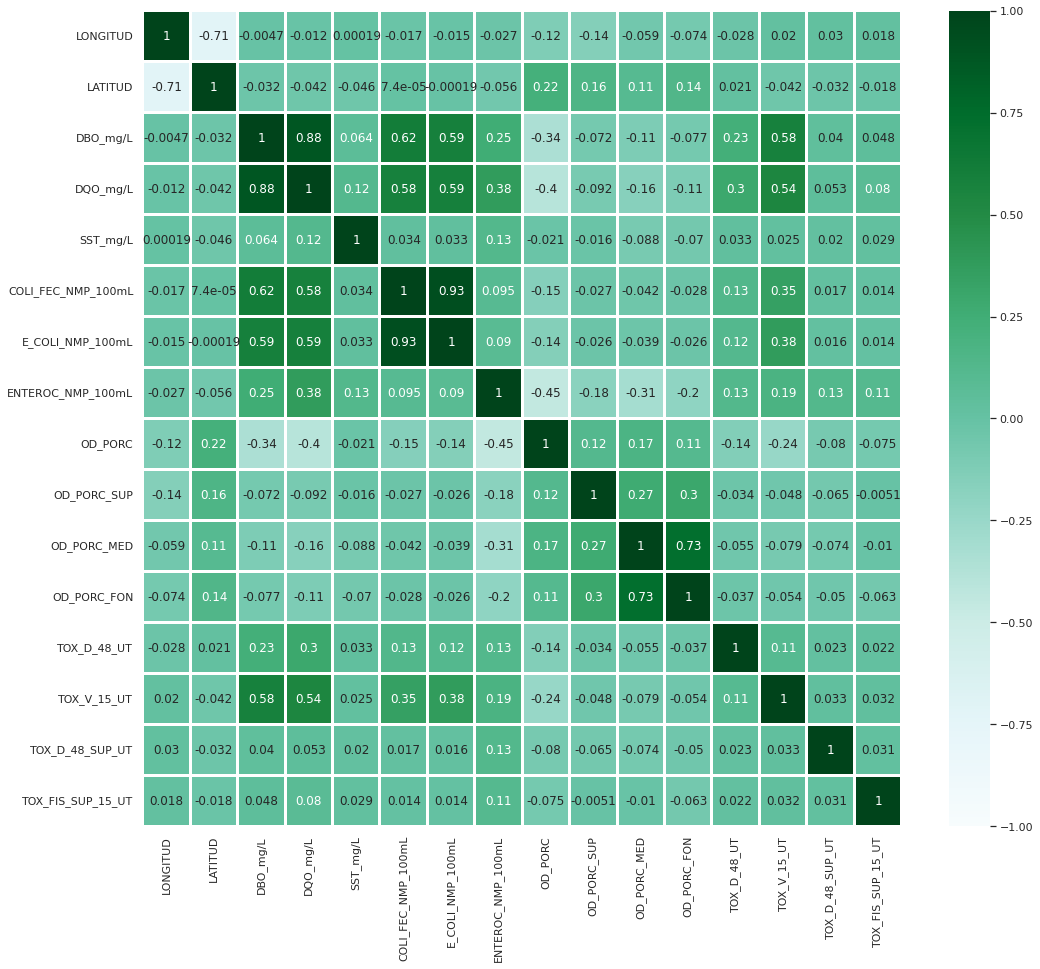

In [30]:
# En esta sección del código, aplicamos un mapa de correlación para analizar que tan dependientes o independientes son las variables entre sí

df_limpio.corr()
mapa = df_limpio.corr()
sns.set(rc = {'figure.figsize':(17,15)})
sns.heatmap(mapa, vmin = -1, vmax = 1, cmap = "BuGn", annot= True, linewidths = 2)

## ARCHIVO 1: ANÁLISIS POR KMEANS

In [119]:
# En esta parte del código, empezamos por asignarle un valor numérico a las variables de salida
# En este caso, quedaron de la siguiente forma:
# Verde 2
# Rojo 1
# Amarillo 0

lbe = LabelEncoder()
df_limpio["SEMAFORO_Type"]= lbe.fit_transform(df_limpio["SEMAFORO"])
df_limpio["SEMAFORO_Type"].unique()

array([2, 0, 1])

In [34]:
# Verificando las asignaciones numéricas de las variables de salida

df_limpio[['SEMAFORO','SEMAFORO_Type']]


,SEMAFORO,SEMAFORO_Type
1,Verde,2
2,Verde,2
3,Verde,2
4,Verde,2
5,Verde,2
...,...,...
3479,Rojo,1
3481,Rojo,1
3483,Rojo,1
3489,Rojo,1


In [360]:
# En esta parte hacemos las transformaciones necesarias para crear dos GeoDataFrame
# El Kdf_Superficiales nos va a ayudar a poner en el mapa las predicciones de Semáforo por Cluster
# El gdf_Superficiales nos va a ayudar a poner en el mapa los valores reales de Semáforo por Cluster


df_limpio["Coordinates"] = list(zip(df_limpio.LONGITUD, df_limpio.LATITUD))
df_limpio["Coordinates"] = df_limpio["Coordinates"].apply(Point)

Kdf_Superficiales = gpd.GeoDataFrame(df_limpio, geometry="Coordinates")
gdf_Superficiales = gpd.GeoDataFrame(df_limpio, geometry="Coordinates")


,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,...,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO,SEMAFORO_Type,Coordinates
1,DLBAJ100,"LOS CABOS SEG 22, 2 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN JOSE DEL CABO,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.84290,...,SI,SI,SI,SI,SI,SI,SI,COSTERO,2,POINT (-109.84290 22.90473)
2,DLBAJ101,"LOS CABOS SEG 22, 1 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.86442,...,SI,SI,SI,SI,SI,SI,SI,COSTERO,2,POINT (-109.86442 22.89880)
3,DLBAJ102,LOS CABOS 3,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.88604,...,SI,SI,SI,SI,SI,SI,SI,COSTERO,2,POINT (-109.88604 22.89609)
4,DLBAJ103,LOS CABOS 1,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.89657,...,SI,SI,SI,SI,SI,SI,SI,COSTERO,2,POINT (-109.89657 22.87694)
5,DLBAJ104,BAHIA CABO SAN LUCAS,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.90250,...,SI,SI,SI,SI,SI,SI,SI,COSTERO,2,POINT (-109.90250 22.88000)


In [37]:
# Obtenemos la variable world para poder graficar en el mapa de México

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

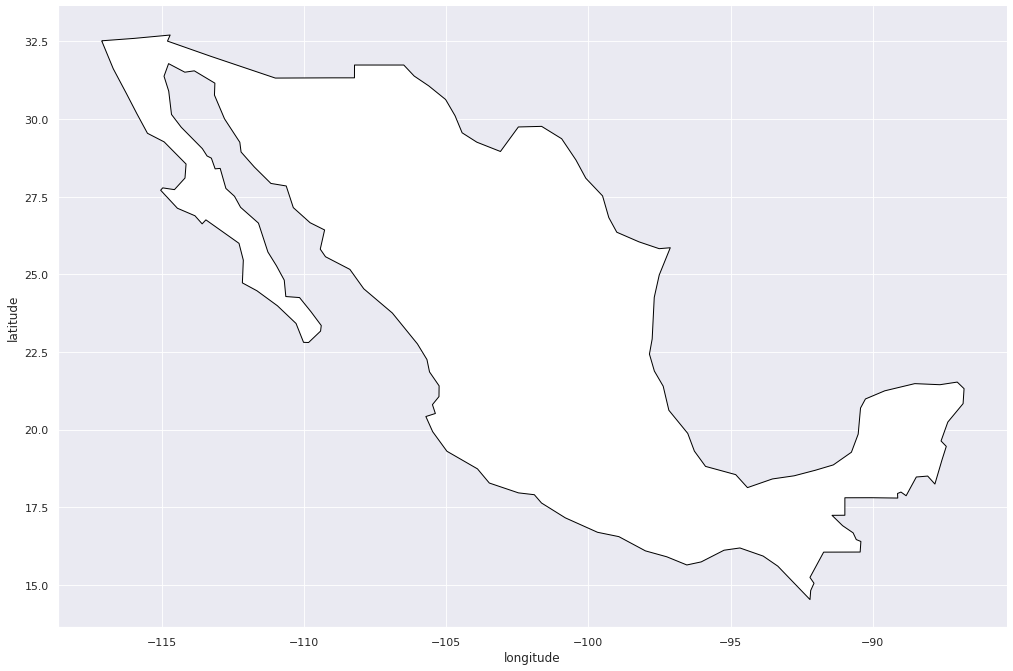

In [39]:
# Verificamos que obtuvimos correctamente el mapa de México para introducirle los valores 

fig, gax = plt.subplots(figsize=(17,17))

world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

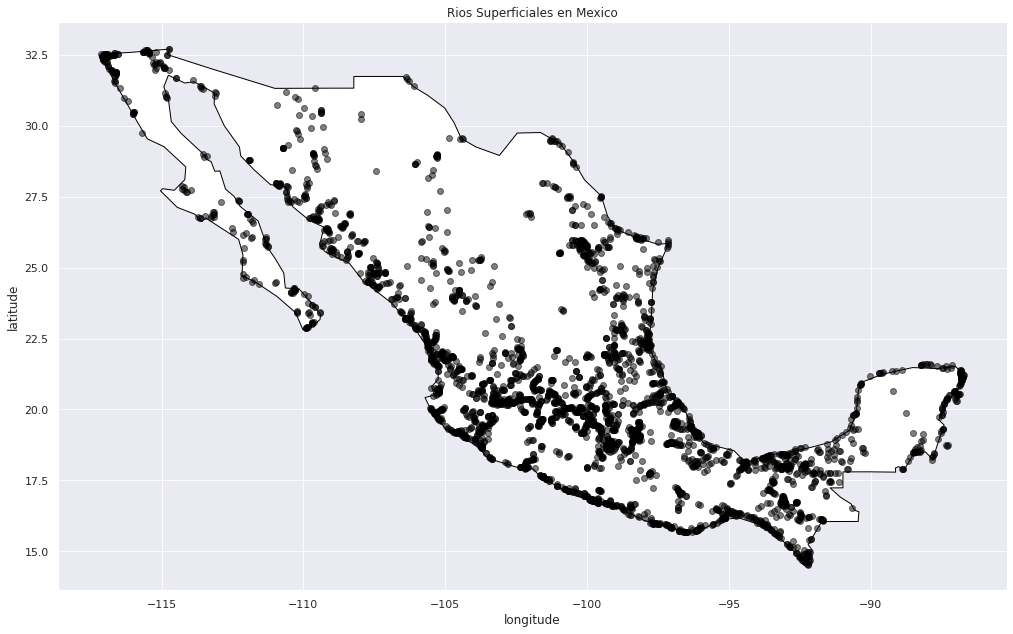

In [42]:
# En esta parte del código graficamos la localización de los cuerpos de agua de color negro 

fig, gax = plt.subplots(figsize=(17,17))

world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

Kdf_Superficiales.plot(ax=gax, color='Black', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Rios Superficiales en Mexico')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

In [107]:
# Obtenemos nuestras variables de entrada para el uso de Kmeans y su entrenamiento & predicción

X_Coordenadas = df_limpio[["LATITUD","LONGITUD"]]
X_Coordenadas

,LATITUD,LONGITUD
1,22.90473,-109.84290
2,22.89880,-109.86442
3,22.89609,-109.88604
4,22.87694,-109.89657
5,22.88000,-109.90250
...,...,...
3479,26.04574,-98.28476
3481,26.19254,-98.92999
3483,26.05497,-98.27113
3489,27.43714,-99.53064


In [159]:
# Obtenemos la variable de salida para el uso de Kmeans y su entrenamiento & predicción

Y = df_limpio[["SEMAFORO_Type"]]
Y

,SEMAFORO_Type
1,2
2,2
3,2
4,2
5,2
...,...
3479,1
3481,1
3483,1
3489,1


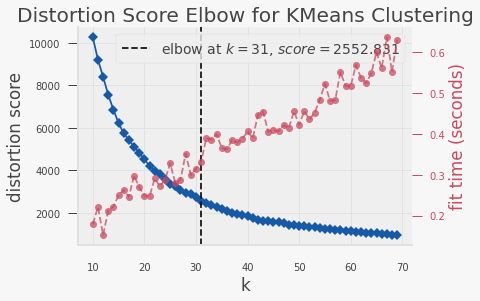

In [367]:
long_lat=list(zip(df_limpio.LATITUD, df_limpio.LONGITUD))

# Utilizamos la función make_blobs para poner el archivo de coordenadas de forma Gaussiana y hacer las burbujas

blob_centers = long_lat

X_Coordenadas_blobs, Y_blobs = make_blobs(n_samples=3493, centers=blob_centers, cluster_std=0.20,
                  random_state=42)
# Aplicamos el modelo KElbowVisualizar de KMeans para que nos ayude a encontrar el mejor valor de k

# Con el mejor valor de k, es que determinaremos el número de clusters a proponer

model = KElbowVisualizer(KMeans(), k=(10,70))
model.fit(X_Coordenadas_blobs)
model.show()

In [434]:
# Guardamos el valor de k en una variable , entrenamos y predecimos con las coordenadas de X, en realidad Y es irrelevante

k = model.elbow_value_

kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X_Coordenadas,Y)


In [369]:
# En esta parte del código creamos un nuevo dataframe en donde podamos juntar la localización de los N clusters que obtuvimos
# De igual forma a cada cluster le asignamos un número de identificación para poder indexarlo y referenciarlo más adelante

C = kmeans.cluster_centers_

C_DF = pd.DataFrame(C)
C_DF["Coordinates"] = list(zip(C_DF[1], C_DF[0]))
C_DF["Coordinates"] = C_DF["Coordinates"].apply(Point)

labels = kmeans.predict(X_Coordenadas)

gdf_C_superficiales = gpd.GeoDataFrame(C_DF, geometry="Coordinates")
gdf_C_superficiales['Numero de Cluster']="hola"
z=0
while z<k:
  gdf_C_superficiales['Numero de Cluster'][z]=z
  z=z+1

gdf_C_superficiales

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,0,1,Coordinates,Numero de Cluster
0,17.981914,-101.808326,POINT (-101.80833 17.98191),0
1,18.044180,-92.342520,POINT (-92.34252 18.04418),1
2,26.722996,-112.612977,POINT (-112.61298 26.72300),2
3,25.664496,-99.929374,POINT (-99.92937 25.66450),3
4,16.211407,-96.411727,POINT (-96.41173 16.21141),4
5,24.254121,-107.071402,POINT (-107.07140 24.25412),5
6,32.041546,-115.968500,POINT (-115.96850 32.04155),6
7,20.501574,-97.457219,POINT (-97.45722 20.50157),7
8,20.919053,-87.140064,POINT (-87.14006 20.91905),8
9,21.758140,-105.233334,POINT (-105.23333 21.75814),9


In [370]:
# En esta sección, pasamos solamente el número de clusters a un array, con el objetivo de usarlo para ciclos for más adelante

numero_almacen= list()
for row in gdf_C_superficiales['Numero de Cluster'] :
    numero_almacen.append(gdf_C_superficiales['Numero de Cluster'][row])

print(numero_almacen)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [372]:
# En esta sección de código vamos a crear dos dataframes
# lista_clusters - en este DF, tendremos todos los cuerpos de agua con 4 variables principales: longitud, latitud, el número de cluster 
# que le toca y su valor individual de semáforo

# cantidadGrupo - en este DF, tendremos una lista que nos relaciona cuantos cuerpos de agua están agrupados en cada uno de los N clusters obtenidos

referencias=[]

for z in numero_almacen:
  referencias.append(numero_almacen[z])
referencias

lista_clusters =  pd.DataFrame()
lista_clusters['Latitud']=df_limpio['LATITUD'].values
lista_clusters['Longitud']=df_limpio['LONGITUD'].values
lista_clusters['NUMCLUSTER'] = y_pred
lista_clusters['Semáforo'] = df_limpio['SEMAFORO_Type'].values

cantidadGrupo =  pd.DataFrame()
cantidadGrupo['NUMCLUSTER']=referencias
cantidadGrupo['Cantidad de Cuerpos de Agua a Predecir Contaminación']=lista_clusters.groupby('NUMCLUSTER').size()
cantidadGrupo



,NUMCLUSTER,Cantidad de Cuerpos de Agua a Predecir Contaminación
0,0,95
1,1,146
2,2,51
3,3,120
4,4,145
5,5,97
6,6,121
7,7,108
8,8,88
9,9,167


In [373]:
# Aquí verificamos la creación correcta del DF lista_clusters

lista_clusters

,Latitud,Longitud,NUMCLUSTER,Semáforo
0,22.90473,-109.84290,18,2
1,22.89880,-109.86442,18,2
2,22.89609,-109.88604,18,2
3,22.87694,-109.89657,18,2
4,22.88000,-109.90250,18,2
...,...,...,...,...
3488,26.04574,-98.28476,23,1
3489,26.19254,-98.92999,3,1
3490,26.05497,-98.27113,23,1
3491,27.43714,-99.53064,29,1


In [348]:
# Usaremos lista_clusters para sacar un valor de Contaminación por cluster, con el objetivo de predecir si un valor toca cierto cluster
# qué nivel de contaminación tendría 

# promedios_contaminacion_semaforo nos dice, por cada uno de los clusters, el valor promedio de contaminación que esa región predice tener 

from statistics import mode

promedios_contaminacion_semaforo=list()
d = {}
for name in numero_almacen:
    d[name] = pd.DataFrame()
    d[name] = lista_clusters[lista_clusters.NUMCLUSTER == name].copy()
    promedio=d[name]['Semáforo'].mode()[0]
    if(promedio>1.7):
      promedio_int=math.ceil(promedio)
    else: 
      promedio_int=math.floor(promedio)
    promedios_contaminacion_semaforo.append(promedio_int)

promedios_contaminacion_semaforo


[2, 2, 1, 2, 2, 2, 0, 2, 0, 2, 1, 2, 0, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 0, 0]

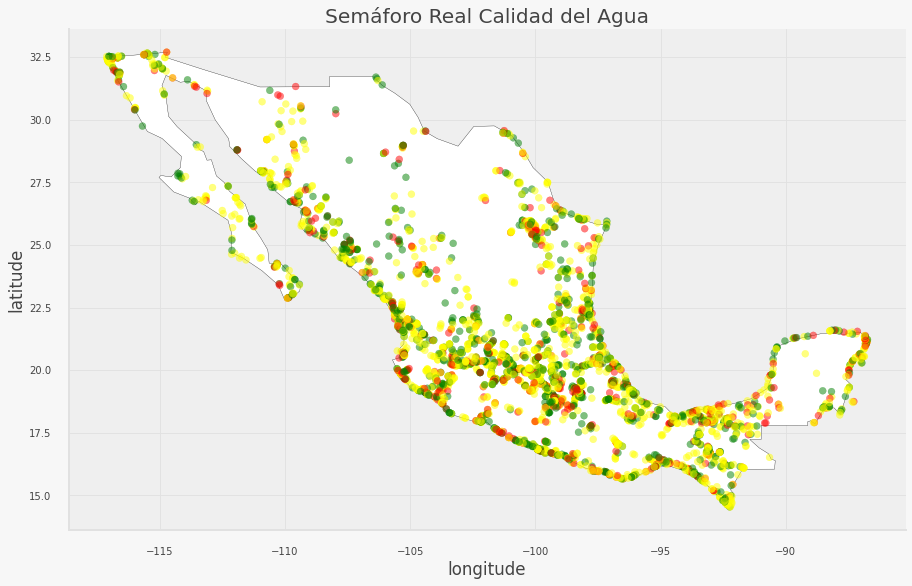

In [366]:
# En esta sección del código, simplemente graficamos los cuerpos de agua con su valor actual de semáforo, para visualización


kmeans2 = KMeans(n_clusters=3, random_state=42).fit(X_Coordenadas_blobs, Y_blobs)
centroids2 = kmeans2.cluster_centers_
labels2 = kmeans2.predict(X_Coordenadas_blobs)
# Getting the cluster centers
C2 = kmeans2.cluster_centers_

C2_DF = pd.DataFrame(C2)
C2_DF["Coordinates"] = list(zip(C2_DF[0], C2_DF[1]))
C2_DF["Coordinates"] = C2_DF["Coordinates"].apply(Point)


gdf_C_superficiales_2 = gpd.GeoDataFrame(C2_DF, geometry="Coordinates")

fig, gax = plt.subplots(figsize=(15,10))

colores2 = ['green','red','yellow']

color_asig2 = []

for row in labels2:
  color_asig2.append(colores2[row])


world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')


gdf_Superficiales.plot(ax=gax, color=color_asig2, alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Semáforo Real Calidad del Agua')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

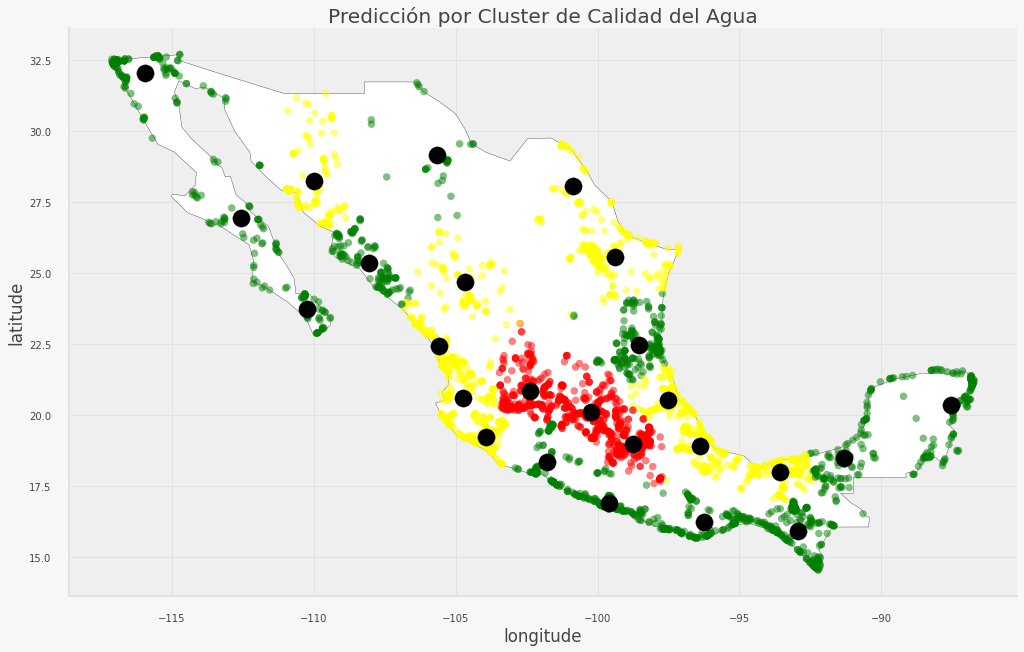

In [354]:
# En esta sección del código, graficamos la ubicación de los clusters, y pintamos sus cuerpos de agua relacionados con el valor moda
# del nivel de contaminación (semárofo) que el cluster predice tener 

from sklearn.utils.extmath import row_norms
fig, gax = plt.subplots(figsize=(17,17))

#promedios_contaminacion_semaforo [1.0, 1.0, 1.0, 1.0, 2.0, 1.0]
colores = []
color_asig = []

# Verde 2
# Rojo 1
# Amarillo 0
for numeros in promedios_contaminacion_semaforo:
  if (numeros==1.0):
    colores.append('red')
  if (numeros==2.0):
    colores.append('green')
  if (numeros==0.0):
    colores.append('yellow')    

for row in y_pred:
  color_asig.append(colores[row])


# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
Kdf_Superficiales.plot(ax=gax, color=color_asig, alpha = 0.5)
gdf_C_superficiales.plot(ax=gax, color='black', alpha = 1, markersize = 300)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Predicción por Cluster de Calidad del Agua')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


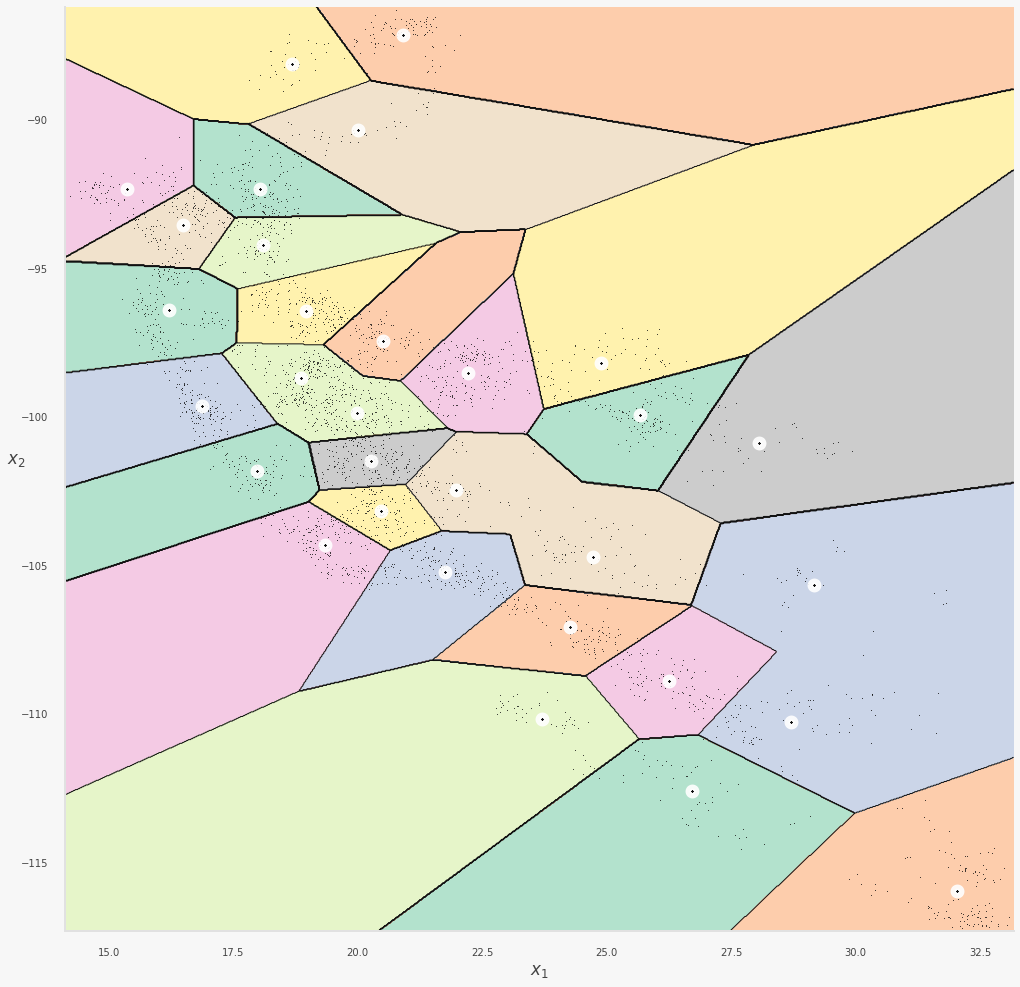

In [374]:
# En esta sección estaremos graficando la frontera de cada uno de los clusters, para determinar su área de grupo perteneciente

def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    W=Z

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)


plt.figure(figsize=(17, 17))
plot_decision_boundaries(kmeans, X_Coordenadas_blobs)
#plt.plot(world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white'))
plt.show()


# SEGUNDO DATAFRAME

In [379]:

df2 = pd.read_csv('/content/DF_Subterraneas.csv',
                 encoding='latin-1')
df2.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [380]:
df2.describe()

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm,SDT_mg/L
count,1068.000000,1068.000000,1068.0,1064.000000,1062.000000,0.0
mean,-101.891007,23.163618,2020.0,235.633759,1138.953013,NaN
std,6.703263,3.887670,0.0,116.874291,1245.563674,NaN
min,-116.664250,14.561150,2020.0,26.640000,50.400000,NaN
25%,-105.388865,20.212055,2020.0,164.000000,501.750000,NaN
50%,-102.174180,22.617190,2020.0,215.527500,815.000000,NaN
75%,-98.974716,25.510285,2020.0,292.710000,1322.750000,NaN
max,-86.864120,32.677713,2020.0,1650.000000,18577.000000,NaN


In [381]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L           

In [382]:
df2.columns

Index(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
       'ACUIFERO', 'SUBTIPO', 'LONGITUD', 'LATITUD', 'PERIODO', 'ALC_mg/L',
       'CALIDAD_ALC', 'CONDUCT_mS/cm', 'CALIDAD_CONDUC', 'SDT_mg/L',
       'SDT_M_mg/L', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'FLUORUROS_mg/L',
       'CALIDAD_FLUO', 'DUR_mg/L', 'CALIDAD_DUR', 'COLI_FEC_NMP/100_mL',
       'CALIDAD_COLI_FEC', 'N_NO3_mg/L', 'CALIDAD_N_NO3', 'AS_TOT_mg/L',
       'CALIDAD_AS', 'CD_TOT_mg/L', 'CALIDAD_CD', 'CR_TOT_mg/L', 'CALIDAD_CR',
       'HG_TOT_mg/L', 'CALIDAD_HG', 'PB_TOT_mg/L', 'CALIDAD_PB', 'MN_TOT_mg/L',
       'CALIDAD_MN', 'FE_TOT_mg/L', 'CALIDAD_FE', 'SEMAFORO', 'CONTAMINANTES',
       'CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra',
       'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR',
       'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD',
       'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN',
       'CUMPLE_CON_FE'],
      dtype='

In [383]:
df2_verde = pd.DataFrame(df2[df2['SEMAFORO'] == 'Verde'])
df2_rojo = pd.DataFrame(df2[df2['SEMAFORO'] == 'Rojo'])
df2_amarillo = pd.DataFrame(df2[df2['SEMAFORO'] == 'Amarillo'])

In [ ]:
df2_verde

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.022100,22.208870,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.200750,21.999580,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.294490,22.184350,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
6,DLBAJ110,"POZO 26, SAN JUAN",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.213960,23.474600,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
8,DLBAJ117,LAS PARRITAS,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,EL CARRIZAL,POZO,-110.088778,23.799861,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1056,OCRBR5007M2,EJIDO SANTA ISABEL Y DOLORES (TOMA DOMICILIARI...,RIO BRAVO,NUEVO LEON,CADEREYTA JIMENEZ,CITRICOLA NORTE,POZO,-99.779110,25.533690,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1057,OCRBR5008M1,POZO SAN JERONIMO II (SADM),RIO BRAVO,NUEVO LEON,MONTERREY,AREA METROPOLITANA DE MONTERREY,POZO,-100.364400,25.675370,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1059,OCRBR5046M2,EJIDO EL CALVARIO (POZO COMUNITARIO),RIO BRAVO,NUEVO LEON,CADEREYTA JIMENEZ,CITRICOLA NORTE,POZO,-99.838100,25.557590,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1066,OCRBR5106M1,COMUNIDAD LOS POCITOS,RIO BRAVO,NUEVO LEON,GALEANA,NAVIDAD-POTOSI-RAICES,POZO,-100.326830,24.801180,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI


In [384]:
df2_amarillo

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
17,DLBAJ131,"L. 20, EJ. STO. DOMINGO",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,COMONDU,SANTO DOMINGO,POZO,-111.922210,25.504700,2020,...,NO,SI,SI,SI,SI,SI,SI,SI,SI,SI
21,DLBAJ150,POZO 2A,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LORETO,SAN JUAN B. LONDO,POZO,-111.548940,26.301760,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
24,DLBAJ161,CNA-SI-03 (EJ. ALFREDO V. BONFIL),PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,MULEGE,SAN IGNACIO,POZO,-112.762754,27.335900,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,NO
37,DLBAJ70,POZO NO. XII (ANTES A.P. XII),PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,LA PAZ,POZO,-110.307730,24.080080,2020,...,NO,SI,SI,SI,SI,SI,SI,SI,SI,NO
38,DLBAJ71,A.P. NO. X,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,LA PAZ,POZO,-110.315380,24.054960,2020,...,NO,SI,SI,SI,SI,SI,SI,SI,SI,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,OCPYU6428,TIXKOKOB.,PENINSULA DE YUCATAN,YUCATAN,TIXKOKOB,PENINSULA DE YUCATAN,POZO,-89.393611,21.002222,2020,...,NO,SI,SI,SI,SI,SI,SI,SI,SI,SI
1048,OCPYU6429,TIXPHEUAL,PENINSULA DE YUCATAN,YUCATAN,TIXPEHUAL,PENINSULA DE YUCATAN,POZO,-89.441667,20.977778,2020,...,NO,SI,SI,SI,SI,SI,SI,SI,SI,SI
1050,OCPYU6431,POZO 2 PISTE,PENINSULA DE YUCATAN,YUCATAN,TINUM,PENINSULA DE YUCATAN,POZO,-88.589530,20.704360,2020,...,NO,SI,SI,SI,SI,SI,SI,SI,SI,SI
1051,OCPYU6432,XOCCHEL,PENINSULA DE YUCATAN,YUCATAN,XOCCHEL,PENINSULA DE YUCATAN,POZO,-89.182510,20.837920,2020,...,NO,SI,SI,SI,SI,SI,SI,SI,SI,SI


In [385]:
df2_rojo

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.288010,22.366850,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.244800,23.451380,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
5,DLBAJ108,POZO A.P. CNA 7 (ANTES POZO A.P. CNA 6),PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.220670,23.464930,2020,...,SI,NO,SI,SI,SI,SI,SI,SI,SI,SI
7,DLBAJ111,VICTOR HUGO CESEÑA,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,CABO SAN LUCAS,POZO,-109.907306,22.890500,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
9,DLBAJ118,SAN ANTONIO,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,LOS PLANES,POZO,-110.054722,23.824722,2020,...,NO,NO,SI,NO,SI,SI,SI,SI,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1060,OCRBR5087M1,POZO RANCHO NOGALITOS-RAYMUNDO TREVIÑO-EJ. LA ...,RIO BRAVO,NUEVO LEON,GENERAL TERAN,CITRICOLA NORTE,POZO,-99.729440,25.284440,2020,...,NO,NO,SI,SI,SI,SI,SI,SI,SI,SI
1061,OCRBR5093M1,L-343 (EJIDO ELDIEZ),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.434410,24.848210,2020,...,NO,SI,NO,SI,SI,SI,SI,SI,SI,SI
1063,OCRBR5101M1,L-310 (COMUNIDAD SAN MANUEL),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.541910,24.760360,2020,...,NO,SI,NO,SI,SI,SI,SI,SI,SI,SI
1064,OCRBR5102M1,L-305 (EJIDO OJO DE AGUA LAS CRUCESITAS),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.700990,24.782800,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [386]:
NumericasQuimicas2 = ['ALC_mg/L','CONDUCT_mS/cm','SDT_mg/L','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL',
                      'N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L',
                      ]
CategoriasQuimicas2 = ['CALIDAD_ALC','CALIDAD_CONDUC','CALIDAD_SDT_ra','CALIDAD_SDT_salin','CALIDAD_FLUO','CALIDAD_DUR',
                       'CALIDAD_COLI_FEC','CALIDAD_N_NO3','CALIDAD_AS','CALIDAD_CD','CALIDAD_CR','CALIDAD_HG','CALIDAD_PB',
                       'CALIDAD_MN','CALIDAD_FE']

CategoricasCumplimiento2 = ['CUMPLE_CON_ALC','CUMPLE_CON_COND','CUMPLE_CON_SDT_ra','CUMPLE_CON_SDT_salin','CUMPLE_CON_FLUO','CUMPLE_CON_DUR',
                            'CUMPLE_CON_CF','CUMPLE_CON_NO3','CUMPLE_CON_AS','CUMPLE_CON_CD','CUMPLE_CON_CR','CUMPLE_CON_HG','CUMPLE_CON_PB','CUMPLE_CON_MN','CUMPLE_CON_FE']


print(len(NumericasQuimicas2))

promedios_verdes2 = list()
promedios_rojos2 = list()
promedios_amarillos2 = list()
nombres2 = list()

for name in NumericasQuimicas2:
  df2_verde[name] = df2_verde[name].astype('str')
  df2_verde[name] = df2_verde[name].str.replace('<25','25',regex=True) 
  df2_verde[name] = df2_verde[name].str.replace('<0.2','0.2',regex=True) 
  df2_verde[name] = df2_verde[name].str.replace('<20','20',regex=True) 
  df2_verde[name] = df2_verde[name].str.replace('<1.1','1.1',regex=True)
  df2_verde[name] = df2_verde[name].str.replace('<0.02','0.02',regex=True) 
  df2_verde[name] = df2_verde[name].str.replace('<0.01','0.01',regex=True) 
  df2_verde[name] = df2_verde[name].str.replace('<0.003','0.003',regex=True)
  df2_verde[name] = df2_verde[name].str.replace('<0.005','0.004',regex=True) 
  df2_verde[name] = df2_verde[name].str.replace('<0.0005','0.0004',regex=True) 
  df2_verde[name] = df2_verde[name].str.replace('<0.0015','0.0015',regex=True) 
  df2_verde[name] = df2_verde[name].str.replace('<0.025','0.025',regex=True) 
  df2_verde[name]= df2_verde[name].astype('float')
  mean1_2 = df2_verde[name].mean()
  df2_verde[name] = df2_verde[name].replace(np.nan,mean1_2)
  print("Promedio Verde ",name,mean1_2)
  promedios_verdes2.append(mean1_2)
  nombres2.append(name)
print("\n")


for name in NumericasQuimicas2:
  df2_rojo[name] = df2_rojo[name].astype('str')
  df2_rojo[name] = df2_rojo[name].str.replace('<25','25',regex=True) 
  df2_rojo[name] = df2_rojo[name].str.replace('<0.2','0.2',regex=True) 
  df2_rojo[name] = df2_rojo[name].str.replace('<20','20',regex=True) 
  df2_rojo[name] = df2_rojo[name].str.replace('<1.1','1.1',regex=True)
  df2_rojo[name] = df2_rojo[name].str.replace('<0.02','0.02',regex=True) 
  df2_rojo[name] = df2_rojo[name].str.replace('<0.01','0.01',regex=True) 
  df2_rojo[name] = df2_rojo[name].str.replace('<0.003','0.003',regex=True)
  df2_rojo[name] = df2_rojo[name].str.replace('<0.005','0.004',regex=True) 
  df2_rojo[name] = df2_rojo[name].str.replace('<0.0005','0.0004',regex=True) 
  df2_rojo[name] = df2_rojo[name].str.replace('<0.0015','0.0015',regex=True) 
  df2_rojo[name] = df2_rojo[name].str.replace('<0.025','0.025',regex=True)  
  df2_rojo[name]= df2_rojo[name].astype('float')
  mean2_2 = df2_rojo[name].mean()
  df2_rojo[name] = df2_rojo[name].replace(np.nan,mean2_2)
  print("Promedio Rojo ",name,mean2_2)
  promedios_rojos2.append(mean2_2)

print("\n")
    
for name in NumericasQuimicas2:
  df2_amarillo[name] = df2_amarillo[name].astype('str')
  df2_amarillo[name] = df2_amarillo[name].str.replace('<25','25',regex=True) 
  df2_amarillo[name] = df2_amarillo[name].str.replace('<0.2','0.2',regex=True) 
  df2_amarillo[name] = df2_amarillo[name].str.replace('<20','20',regex=True) 
  df2_amarillo[name] = df2_amarillo[name].str.replace('<1.1','1.1',regex=True)
  df2_amarillo[name] = df2_amarillo[name].str.replace('<0.02','0.02',regex=True) 
  df2_amarillo[name] = df2_amarillo[name].str.replace('<0.01','0.01',regex=True) 
  df2_amarillo[name] = df2_amarillo[name].str.replace('<0.003','0.003',regex=True)
  df2_amarillo[name] = df2_amarillo[name].str.replace('<0.005','0.004',regex=True) 
  df2_amarillo[name] = df2_amarillo[name].str.replace('<0.0005','0.0004',regex=True) 
  df2_amarillo[name] = df2_amarillo[name].str.replace('<0.0015','0.0015',regex=True) 
  df2_amarillo[name] = df2_amarillo[name].str.replace('<0.025','0.025',regex=True)   
  df2_amarillo[name]= df2_amarillo[name].astype('float')
  mean3_2 = df2_amarillo[name].mean()
  df2_amarillo[name] = df2_amarillo[name].replace(np.nan,mean3_2)
  print("Promedio Amarillo ",name,mean3_2)
  promedios_amarillos2.append(mean3_2)

15
Promedio Verde  ALC_mg/L 201.97559027777774
Promedio Verde  CONDUCT_mS/cm 676.7401392111369
Promedio Verde  SDT_mg/L nan
Promedio Verde  SDT_M_mg/L 459.188794470046
Promedio Verde  FLUORUROS_mg/L 0.507428341013825
Promedio Verde  DUR_mg/L 214.69487367205545
Promedio Verde  COLI_FEC_NMP/100_mL 27.92488479262673
Promedio Verde  N_NO3_mg/L 2.6600648775981526
Promedio Verde  AS_TOT_mg/L 0.010583410138248846
Promedio Verde  CD_TOT_mg/L 0.003
Promedio Verde  CR_TOT_mg/L 0.006639953917050693
Promedio Verde  HG_TOT_mg/L 0.00045548387096774206
Promedio Verde  PB_TOT_mg/L 0.004075115207373273
Promedio Verde  MN_TOT_mg/L 0.006466451612903226
Promedio Verde  FE_TOT_mg/L 0.06953410138248849


Promedio Rojo  ALC_mg/L 242.59535064935062
Promedio Rojo  CONDUCT_mS/cm 1251.8161038961039
Promedio Rojo  SDT_mg/L nan
Promedio Rojo  SDT_M_mg/L 896.738514507772
Promedio Rojo  FLUORUROS_mg/L 2.090001550387597
Promedio Rojo  DUR_mg/L 334.6291374677003
Promedio Rojo  COLI_FEC_NMP/100_mL 927.0883720930233
Pro

In [387]:
b=0
super2_list =list()
super2_list2 = list()
super2_list3 = list()

for name in NumericasQuimicas2: 
 super2_list.append([promedios_verdes2[b],nombres2[b]])
 b=b+1

valores2_verdes = ['Alta','Buena para riego','NaN','Potable - Dulce','Media','Potable - Dura','Buena calidad',
                 'Potable - Excelente','Potable - Excelente','Potable - Excelente','Potable - Excelente','Potable - Excelente',
                 'Potable - Excelente','Potable - Excelente','Potable - Excelente']


df2_promediosverdes = pd.DataFrame (super2_list, columns = ['Valores Promedio Verdes','Nombres'])
df2_promediosverdes['Valoración'] = valores2_verdes
df2_promediosverdes['Categorías Quimicas'] = CategoriasQuimicas2
df2_promediosverdes

,Valores Promedio Verdes,Nombres,Valoración,Categorías Quimicas
0,201.975590,ALC_mg/L,Alta,CALIDAD_ALC
1,676.740139,CONDUCT_mS/cm,Buena para riego,CALIDAD_CONDUC
2,NaN,SDT_mg/L,NaN,CALIDAD_SDT_ra
3,459.188794,SDT_M_mg/L,Potable - Dulce,CALIDAD_SDT_salin
4,0.507428,FLUORUROS_mg/L,Media,CALIDAD_FLUO
5,214.694874,DUR_mg/L,Potable - Dura,CALIDAD_DUR
6,27.924885,COLI_FEC_NMP/100_mL,Buena calidad,CALIDAD_COLI_FEC
7,2.660065,N_NO3_mg/L,Potable - Excelente,CALIDAD_N_NO3
8,0.010583,AS_TOT_mg/L,Potable - Excelente,CALIDAD_AS
9,0.003000,CD_TOT_mg/L,Potable - Excelente,CALIDAD_CD


In [388]:
b=0
for name in NumericasQuimicas2: 
 super2_list2.append([promedios_rojos2[b],nombres2[b]])
 b=b+1

valores2_rojos = ['Alta','Permisible para riego','NaN','Potable - Dulce','Alta','Potable - Dura','Aceptable',
                 'Potable - Buena calidad','Apta como FAAP','Apta como FAAP','Potable - Excelente','Potable - Excelente',
                 'Potable - Excelente','Potable - Excelente','Sin efectos en la salud - Puede dar color al agua']


df2_promediosrojos = pd.DataFrame (super2_list2, columns = ['Valores Promedio Rojos','Nombres'])
df2_promediosrojos['Valoración'] = valores2_rojos
df2_promediosrojos['Categorías Quimicas'] = CategoriasQuimicas2
df2_promediosrojos

,Valores Promedio Rojos,Nombres,Valoración,Categorías Quimicas
0,242.595351,ALC_mg/L,Alta,CALIDAD_ALC
1,1251.816104,CONDUCT_mS/cm,Permisible para riego,CALIDAD_CONDUC
2,NaN,SDT_mg/L,NaN,CALIDAD_SDT_ra
3,896.738515,SDT_M_mg/L,Potable - Dulce,CALIDAD_SDT_salin
4,2.090002,FLUORUROS_mg/L,Alta,CALIDAD_FLUO
5,334.629137,DUR_mg/L,Potable - Dura,CALIDAD_DUR
6,927.088372,COLI_FEC_NMP/100_mL,Aceptable,CALIDAD_COLI_FEC
7,7.207844,N_NO3_mg/L,Potable - Buena calidad,CALIDAD_N_NO3
8,0.035542,AS_TOT_mg/L,Apta como FAAP,CALIDAD_AS
9,0.003082,CD_TOT_mg/L,Apta como FAAP,CALIDAD_CD


In [389]:
b=0
for name in NumericasQuimicas2: 
 super2_list3.append([promedios_amarillos2[b],nombres2[b]])
 b=b+1

valores2_amarillos = ['Alta','Permisible para riego','NaN','Ligeramente salobres','Media','Muy dura e indeseable usos industrial y domestico','Buena calidad',
                 'Potable - Buena calidad','Apta como FAAP','Potable - Excelente','No apta como FAAP','Potable - Excelente',
                 'Potable - Excelente','Sin efectos en la salud - Puede dar color al agua','Sin efectos en la salud - Puede dar color al agua']


df2_promediosamarillos = pd.DataFrame (super2_list3, columns = ['Valores Promedio Rojos','Nombres'])
df2_promediosamarillos['Valoración'] = valores2_amarillos
df2_promediosamarillos['Categorías Quimicas'] = CategoriasQuimicas2
df2_promediosamarillos

,Valores Promedio Rojos,Nombres,Valoración,Categorías Quimicas
0,283.650425,ALC_mg/L,Alta,CALIDAD_ALC
1,1772.129675,CONDUCT_mS/cm,Permisible para riego,CALIDAD_CONDUC
2,NaN,SDT_mg/L,NaN,CALIDAD_SDT_ra
3,1665.915718,SDT_M_mg/L,Ligeramente salobres,CALIDAD_SDT_salin
4,0.484559,FLUORUROS_mg/L,Media,CALIDAD_FLUO
5,602.370717,DUR_mg/L,Muy dura e indeseable usos industrial y domestico,CALIDAD_DUR
6,35.470040,COLI_FEC_NMP/100_mL,Buena calidad,CALIDAD_COLI_FEC
7,2.704206,N_NO3_mg/L,Potable - Buena calidad,CALIDAD_N_NO3
8,0.010542,AS_TOT_mg/L,Apta como FAAP,CALIDAD_AS
9,0.003000,CD_TOT_mg/L,Potable - Excelente,CALIDAD_CD


In [390]:
i=0
for name in CategoriasQuimicas2:
   
    valor = df2_promediosverdes[df2_promediosverdes['Categorías Quimicas'] == name]
    valoracion= valor.loc[i]['Valoración']
    df2_verde[name]= df2_verde[name].astype('str')
    df2_verde[name]= df2_verde[name].replace('nan', valoracion)
    i=i+1
    
df2_verde.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 434 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 434 non-null    object 
 1   SITIO                 434 non-null    object 
 2   ORGANISMO_DE_CUENCA   434 non-null    object 
 3   ESTADO                434 non-null    object 
 4   MUNICIPIO             434 non-null    object 
 5   ACUIFERO              434 non-null    object 
 6   SUBTIPO               434 non-null    object 
 7   LONGITUD              434 non-null    float64
 8   LATITUD               434 non-null    float64
 9   PERIODO               434 non-null    int64  
 10  ALC_mg/L              434 non-null    float64
 11  CALIDAD_ALC           434 non-null    object 
 12  CONDUCT_mS/cm         434 non-null    float64
 13  CALIDAD_CONDUC        434 non-null    object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L            

In [391]:
i=0
for name in CategoriasQuimicas2:
   
    valor = df2_promediosrojos[df2_promediosrojos['Categorías Quimicas'] == name]
    valoracion= valor.loc[i]['Valoración']
    df2_rojo[name]= df2_rojo[name].astype('str')
    df2_rojo[name]= df2_rojo[name].replace('nan', valoracion)
    i=i+1
    
df2_rojo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 387 entries, 2 to 1065
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 387 non-null    object 
 1   SITIO                 387 non-null    object 
 2   ORGANISMO_DE_CUENCA   387 non-null    object 
 3   ESTADO                387 non-null    object 
 4   MUNICIPIO             387 non-null    object 
 5   ACUIFERO              387 non-null    object 
 6   SUBTIPO               387 non-null    object 
 7   LONGITUD              387 non-null    float64
 8   LATITUD               387 non-null    float64
 9   PERIODO               387 non-null    int64  
 10  ALC_mg/L              387 non-null    float64
 11  CALIDAD_ALC           387 non-null    object 
 12  CONDUCT_mS/cm         387 non-null    float64
 13  CALIDAD_CONDUC        387 non-null    object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L            

In [392]:
i=0
for name in CategoriasQuimicas2:
   
    valor = df2_promediosamarillos[df2_promediosamarillos['Categorías Quimicas'] == name]
    valoracion= valor.loc[i]['Valoración']
    df2_amarillo[name]= df2_amarillo[name].astype('str')
    df2_amarillo[name]= df2_amarillo[name].replace('nan', valoracion)
    i=i+1
    
df2_amarillo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247 entries, 17 to 1062
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 247 non-null    object 
 1   SITIO                 247 non-null    object 
 2   ORGANISMO_DE_CUENCA   247 non-null    object 
 3   ESTADO                247 non-null    object 
 4   MUNICIPIO             247 non-null    object 
 5   ACUIFERO              247 non-null    object 
 6   SUBTIPO               247 non-null    object 
 7   LONGITUD              247 non-null    float64
 8   LATITUD               247 non-null    float64
 9   PERIODO               247 non-null    int64  
 10  ALC_mg/L              247 non-null    float64
 11  CALIDAD_ALC           247 non-null    object 
 12  CONDUCT_mS/cm         247 non-null    float64
 13  CALIDAD_CONDUC        247 non-null    object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L           

In [393]:
for name in CategoricasCumplimiento2:
    df2_verde[name]= df2_verde[name].astype('str')
    df2_verde[name]= df2_verde[name].replace('ND', 'SI')
    
    df2_rojo[name]= df2_rojo[name].astype('str')
    df2_rojo[name]= df2_rojo[name].replace('ND', 'SI')
    
    df2_amarillo[name]= df2_amarillo[name].astype('str')
    df2_amarillo[name]= df2_amarillo[name].replace('ND', 'SI')

In [394]:
df2_limpio = pd.concat([df2_verde, df2_amarillo, df2_rojo],join='inner')

df2_limpio.drop('SDT_mg/L',axis='columns',inplace=True)
df2_limpio.drop('CONTAMINANTES',axis='columns',inplace=True)
df2_limpio.drop('PERIODO',axis='columns',inplace=True)

df2_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1068 entries, 0 to 1065
Data columns (total 54 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   ALC_mg/L              1068 non-null   float64
 10  CALIDAD_ALC           1068 non-null   object 
 11  CONDUCT_mS/cm         1068 non-null   float64
 12  CALIDAD_CONDUC        1068 non-null   object 
 13  SDT_M_mg/L            1068 non-null   float64
 14  CALIDAD_SDT_ra        1068 non-null   object 
 15  CALIDAD_SDT_salin    

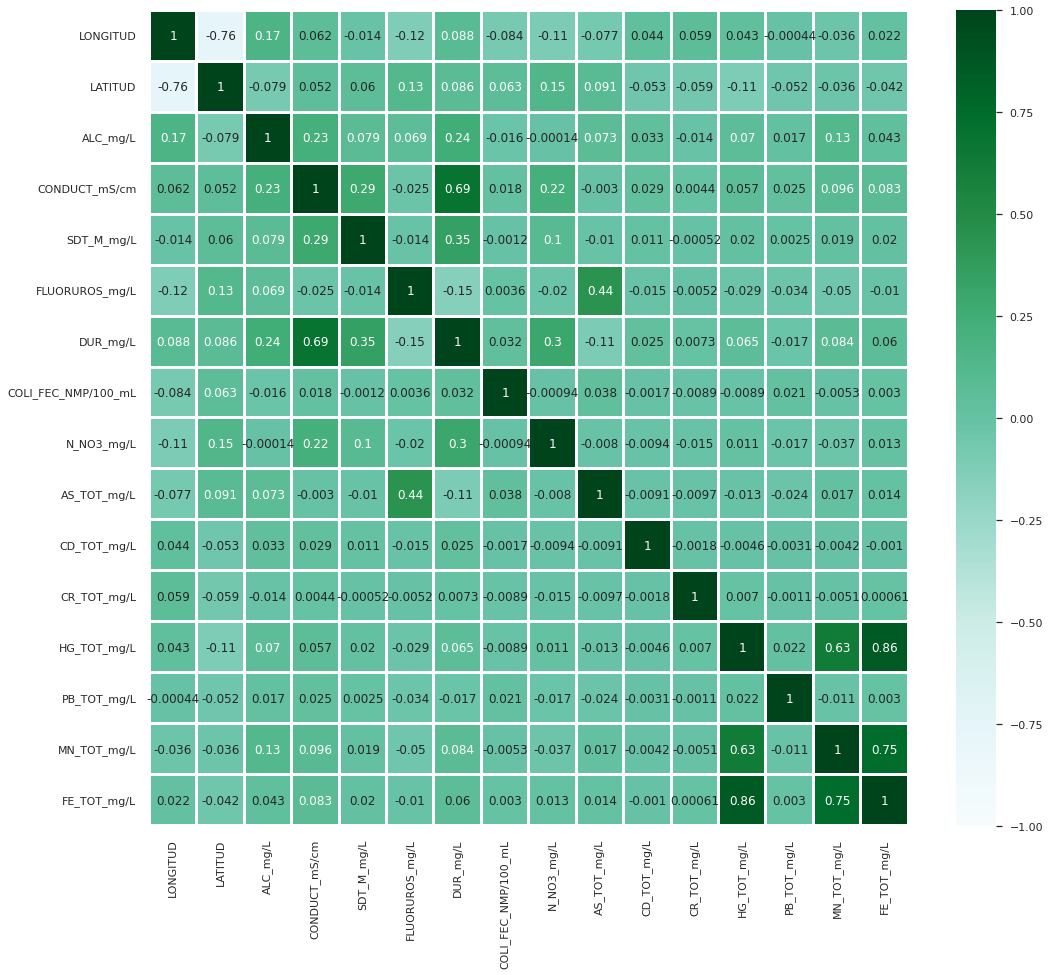

In [395]:
df2_limpio.corr()
mapa2 = df2_limpio.corr()
sns.set(rc = {'figure.figsize':(17,15)})
sns.heatmap(mapa2, vmin = -1, vmax = 1, cmap = "BuGn", annot= True, linewidths = 2)

In [397]:
lbe2 = LabelEncoder()
df2_limpio["SEMAFORO_Type"]= lbe2.fit_transform(df2_limpio["SEMAFORO"])
df2_limpio["SEMAFORO_Type"].unique()

array([2, 0, 1])

In [398]:
df2_limpio[['SEMAFORO','SEMAFORO_Type']]
# Verde 2
# Rojo 1
# Amarillo 0

,SEMAFORO,SEMAFORO_Type
0,Verde,2
1,Verde,2
3,Verde,2
6,Verde,2
8,Verde,2
...,...,...
1060,Rojo,1
1061,Rojo,1
1063,Rojo,1
1064,Rojo,1


In [399]:
df2_limpio["Coordinates"] = list(zip(df2_limpio.LONGITUD, df2_limpio.LATITUD))
df2_limpio["Coordinates"] = df2_limpio["Coordinates"].apply(Point)

Kdf2_Superficiales = gpd.GeoDataFrame(df2_limpio, geometry="Coordinates")
gdf2_Superficiales = gpd.GeoDataFrame(df2_limpio, geometry="Coordinates")

Kdf2_Superficiales.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,ALC_mg/L,...,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE,SEMAFORO_Type,Coordinates
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.022100,22.208870,229.990,...,SI,SI,SI,SI,SI,SI,SI,SI,2,POINT (-102.02210 22.20887)
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.200750,21.999580,231.990,...,SI,SI,SI,SI,SI,SI,SI,SI,2,POINT (-102.20075 21.99958)
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.294490,22.184350,327.000,...,SI,SI,SI,SI,SI,SI,SI,SI,2,POINT (-102.29449 22.18435)
6,DLBAJ110,"POZO 26, SAN JUAN",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.213960,23.474600,203.670,...,SI,SI,SI,SI,SI,SI,SI,SI,2,POINT (-110.21396 23.47460)
8,DLBAJ117,LAS PARRITAS,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,EL CARRIZAL,POZO,-110.088778,23.799861,343.655,...,SI,SI,SI,SI,SI,SI,SI,SI,2,POINT (-110.08878 23.79986)


In [401]:
world2 = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world2 = world2.set_index("iso_a3")

world2.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

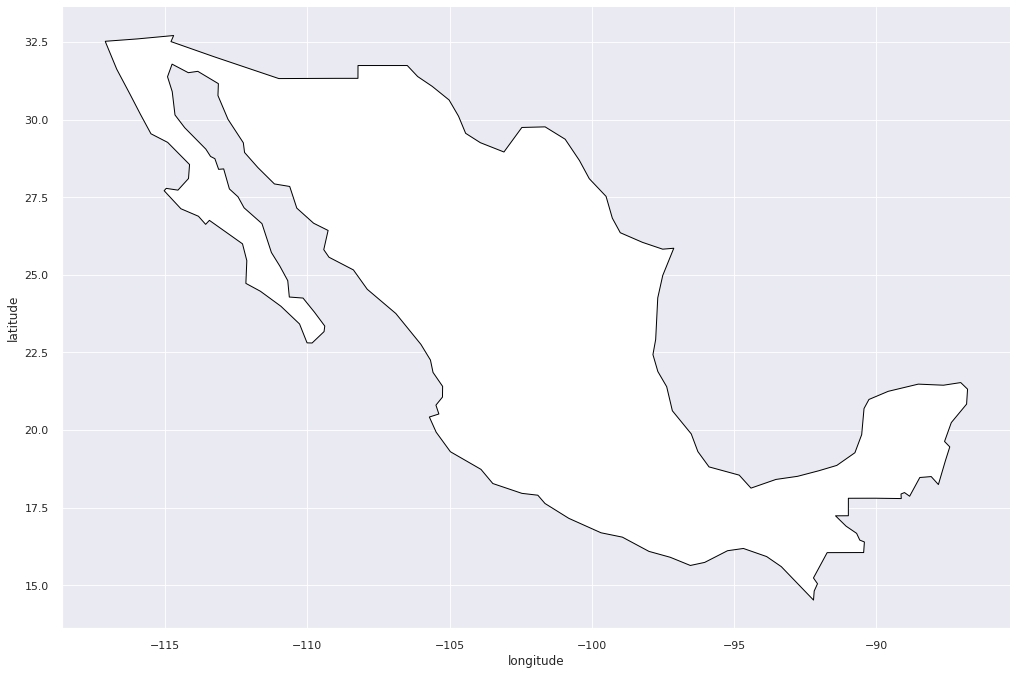

In [402]:
fig, gax = plt.subplots(figsize=(17,17))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world2.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

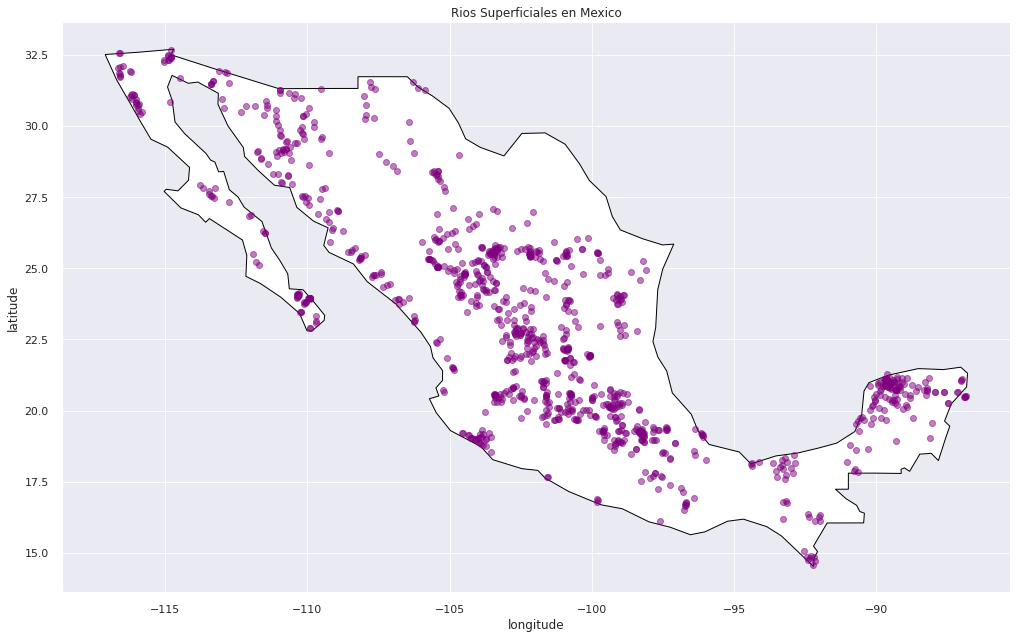

In [403]:
fig, gax = plt.subplots(figsize=(17,17))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world2.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
Kdf2_Superficiales.plot(ax=gax, color='Purple', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Rios Superficiales en Mexico')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

In [404]:
X2_Coordenadas = df2_limpio[["LATITUD","LONGITUD"]]
X2_Coordenadas

,LATITUD,LONGITUD
0,22.208870,-102.022100
1,21.999580,-102.200750
3,22.184350,-102.294490
6,23.474600,-110.213960
8,23.799861,-110.088778
...,...,...
1060,25.284440,-99.729440
1061,24.848210,-99.434410
1063,24.760360,-99.541910
1064,24.782800,-99.700990


In [405]:
Y2 = df2_limpio[["SEMAFORO_Type"]]
Y2

,SEMAFORO_Type
0,2
1,2
3,2
6,2
8,2
...,...
1060,1
1061,1
1063,1
1064,1


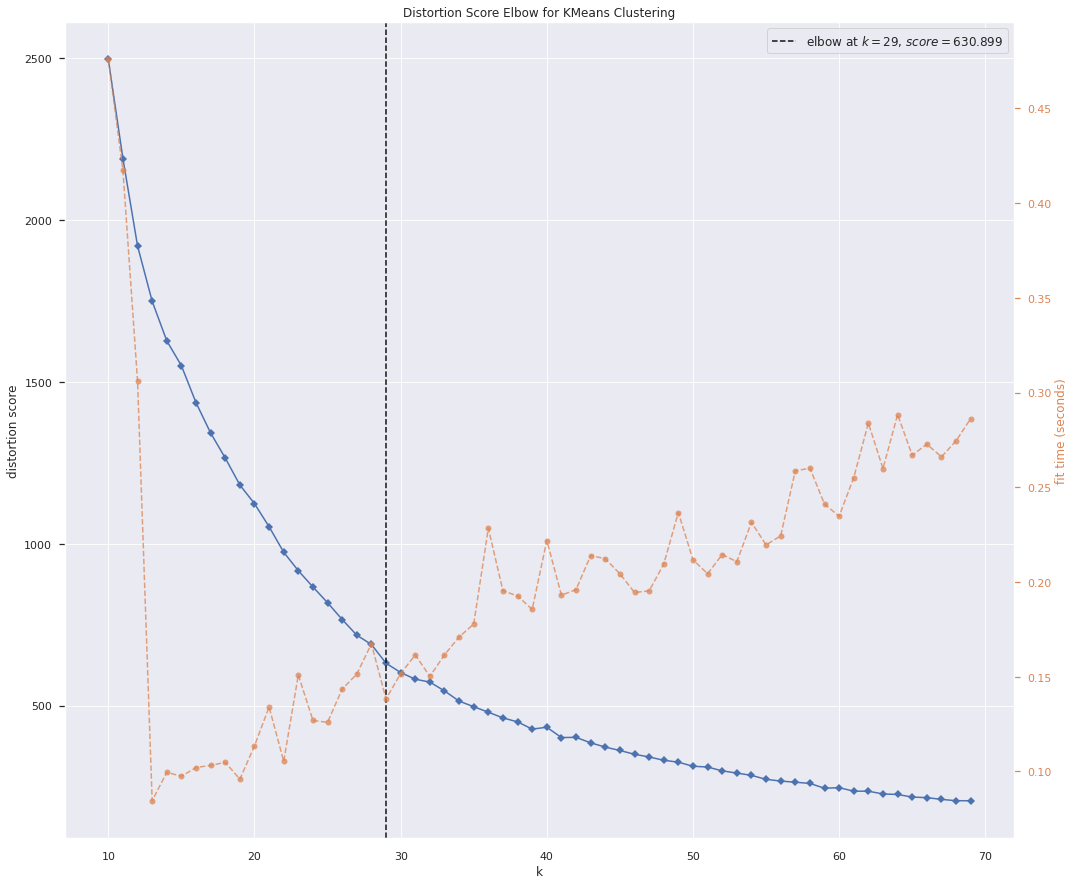

In [406]:
long_lat2=list(zip(df2_limpio.LATITUD, df2_limpio.LONGITUD))

# Utilizamos la función make_blobs para poner el archivo de coordenadas de forma Gaussiana y hacer las burbujas

blob_centers = long_lat2

X2_Coordenadas_blobs, Y2_blobs = make_blobs(n_samples=1068, centers=blob_centers, cluster_std=0.20,
                  random_state=42)
# Aplicamos el modelo KElbowVisualizar de KMeans para que nos ayude a encontrar el mejor valor de k

# Con el mejor valor de k, es que determinaremos el número de almacenes a proponer

model = KElbowVisualizer(KMeans(), k=(10,70))
model.fit(X2_Coordenadas_blobs)
model.show()

In [422]:
k2 = model.elbow_value_

kmeans30 = KMeans(n_clusters=k2, random_state=42)
y2_pred = kmeans30.fit_predict(X2_Coordenadas,Y2)
Y2_Z=pd.DataFrame(y2_pred)
Y2_Z.value_counts()

22    81
7     80
19    70
0     62
8     59
11    57
13    57
3     56
6     45
21    39
15    35
28    35
17    34
18    34
1     31
26    27
10    27
20    26
9     26
16    25
24    24
4     24
12    22
14    20
2     19
23    15
27    14
5     13
25    11
dtype: int64

In [423]:
C20 = kmeans.cluster_centers_

C20_DF = pd.DataFrame(C20)
C20_DF["Coordinates"] = list(zip(C20_DF[1], C20_DF[0]))
C20_DF["Coordinates"] = C20_DF["Coordinates"].apply(Point)

labels20 = kmeans.predict(X2_Coordenadas)

gdf2_C_superficiales = gpd.GeoDataFrame(C20_DF, geometry="Coordinates")
gdf2_C_superficiales['Numero de Cluster']="hola"
z=0
while z<k:
  gdf2_C_superficiales['Numero de Cluster'][z]=z
  z=z+1

gdf2_C_superficiales

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,0,1,Coordinates,Numero de Cluster
0,20.152563,-101.172958,POINT (-101.17296 20.15256),0
1,27.281051,-109.994123,POINT (-109.99412 27.28105),1
2,19.113129,-90.420095,POINT (-90.42010 19.11313),2
3,25.674158,-103.585454,POINT (-103.58545 25.67416),3
4,31.897955,-114.052573,POINT (-114.05257 31.89795),4
5,30.794375,-107.296022,POINT (-107.29602 30.79437),5
6,22.076249,-100.751222,POINT (-100.75122 22.07625),6
7,20.746492,-89.485324,POINT (-89.48532 20.74649),7
8,19.077840,-97.751935,POINT (-97.75194 19.07784),8
9,24.818738,-107.623430,POINT (-107.62343 24.81874),9


In [424]:
numero_almacen2= list()
for row in gdf2_C_superficiales['Numero de Cluster'] :
    numero_almacen2.append(gdf2_C_superficiales['Numero de Cluster'][row])

print(numero_almacen2)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]


In [425]:
referencias2=[]

for z in numero_almacen2:
  referencias2.append(numero_almacen2[z])
referencias2

lista2_clusters =  pd.DataFrame()
lista2_clusters['Latitud']=df2_limpio['LATITUD'].values
lista2_clusters['Longitud']=df2_limpio['LONGITUD'].values
lista2_clusters['NUMCLUSTER'] = y2_pred
lista2_clusters['Semáforo'] = df2_limpio['SEMAFORO_Type'].values

cantidadGrupo2 =  pd.DataFrame()
cantidadGrupo2['NUMCLUSTER']=referencias2
cantidadGrupo2['Cantidad de Cuerpos de Agua a Predecir Contaminación']=lista2_clusters.groupby('NUMCLUSTER').size()
cantidadGrupo2


,NUMCLUSTER,Cantidad de Cuerpos de Agua a Predecir Contaminación
0,0,62
1,1,31
2,2,19
3,3,56
4,4,24
5,5,13
6,6,45
7,7,80
8,8,59
9,9,26


In [426]:
lista2_clusters

,Latitud,Longitud,NUMCLUSTER,Semáforo
0,22.208870,-102.022100,19,2
1,21.999580,-102.200750,19,2
2,22.184350,-102.294490,19,2
3,23.474600,-110.213960,15,2
4,23.799861,-110.088778,15,2
...,...,...,...,...
1063,25.284440,-99.729440,18,1
1064,24.848210,-99.434410,18,1
1065,24.760360,-99.541910,18,1
1066,24.782800,-99.700990,18,1


In [427]:
#Usaremos lista_clusters para sacar un valor de Contaminación por cluster 
from statistics import mode

promedios_contaminacion_semaforo2=list()
d2 = {}
for name in numero_almacen2:
    d2[name] = pd.DataFrame()
    d2[name] = lista2_clusters[lista2_clusters.NUMCLUSTER == name].copy()
    promedio2=d2[name]['Semáforo'].mode()[0]
    if(promedio2>1.7):
      promedio2_int=math.ceil(promedio2)
    else: 
      promedio2_int=math.floor(promedio2)
    promedios_contaminacion_semaforo2.append(promedio2_int)

promedios_contaminacion_semaforo2

[2,
 2,
 0,
 1,
 1,
 1,
 1,
 0,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 2,
 2,
 2,
 2,
 0,
 1,
 0]

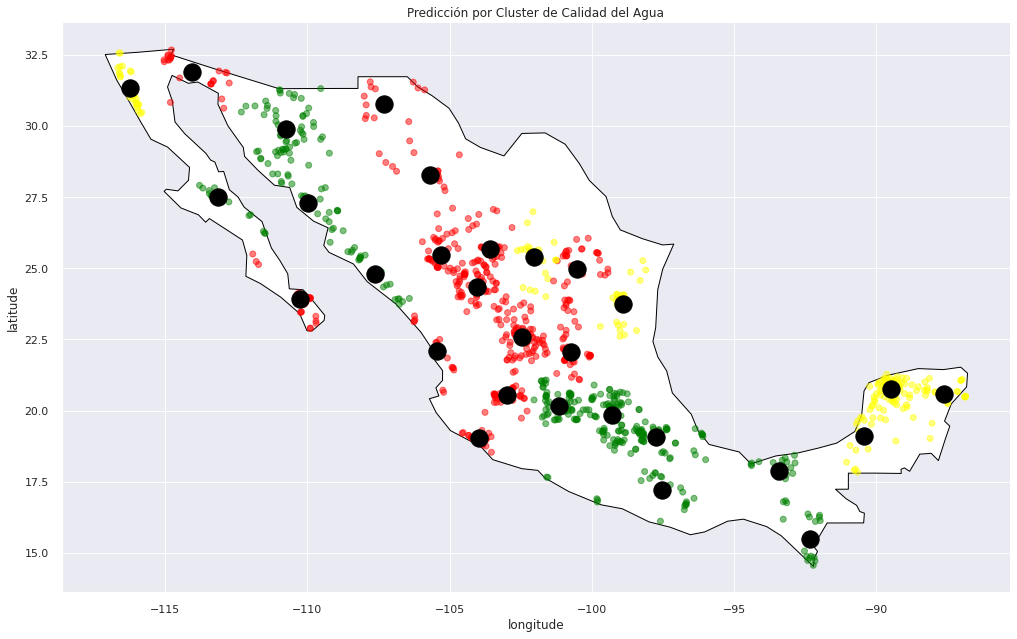

In [428]:
from sklearn.utils.extmath import row_norms
fig, gax = plt.subplots(figsize=(17,17))

#promedios_contaminacion_semaforo [1.0, 1.0, 1.0, 1.0, 2.0, 1.0]
colores20 = []
color_asig20 = []

# Verde 2
# Rojo 1
# Amarillo 0
for numeros in promedios_contaminacion_semaforo2:
  if (numeros==1.0):
    colores20.append('red')
  if (numeros==2.0):
    colores20.append('green')
  if (numeros==0.0):
    colores20.append('yellow')    

for row in y2_pred:
  color_asig20.append(colores20[row])


# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
Kdf2_Superficiales.plot(ax=gax, color=color_asig20, alpha = 0.5)
gdf2_C_superficiales.plot(ax=gax, color='black', alpha = 1, markersize = 300)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Predicción por Cluster de Calidad del Agua')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

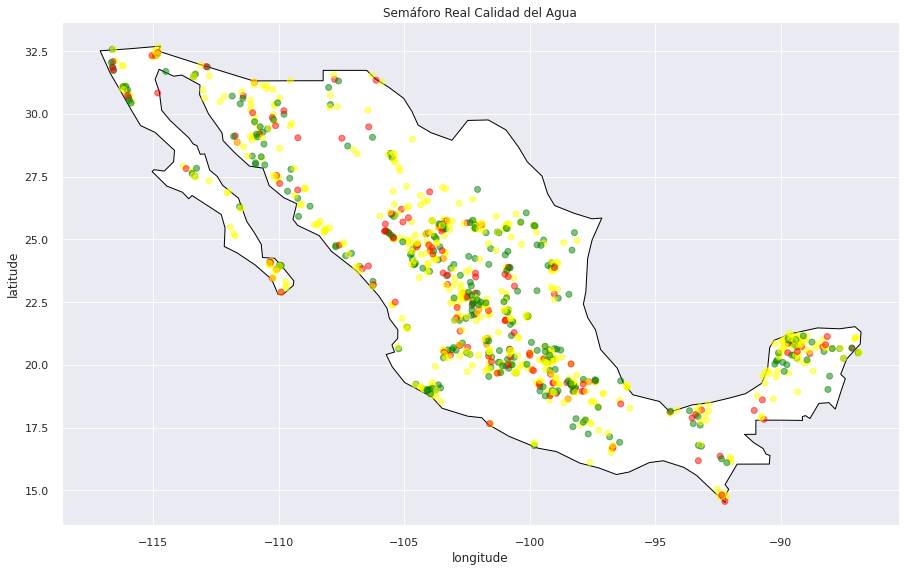

In [429]:
kmeans21 = KMeans(n_clusters=3, random_state=42).fit(X2_Coordenadas_blobs, Y2_blobs)
centroids21 = kmeans21.cluster_centers_
labels21 = kmeans21.predict(X2_Coordenadas_blobs)
# Getting the cluster centers
C21 = kmeans21.cluster_centers_

C21_DF = pd.DataFrame(C21)
C21_DF["Coordinates"] = list(zip(C21_DF[0], C21_DF[1]))
C21_DF["Coordinates"] = C21_DF["Coordinates"].apply(Point)



fig, gax = plt.subplots(figsize=(15,10))

colores21 = ['green','red','yellow']

color_asig21 = []

for row in labels2:
  color_asig21.append(colores21[row])

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf2_Superficiales.plot(ax=gax, color=color_asig21, alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Semáforo Real Calidad del Agua')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


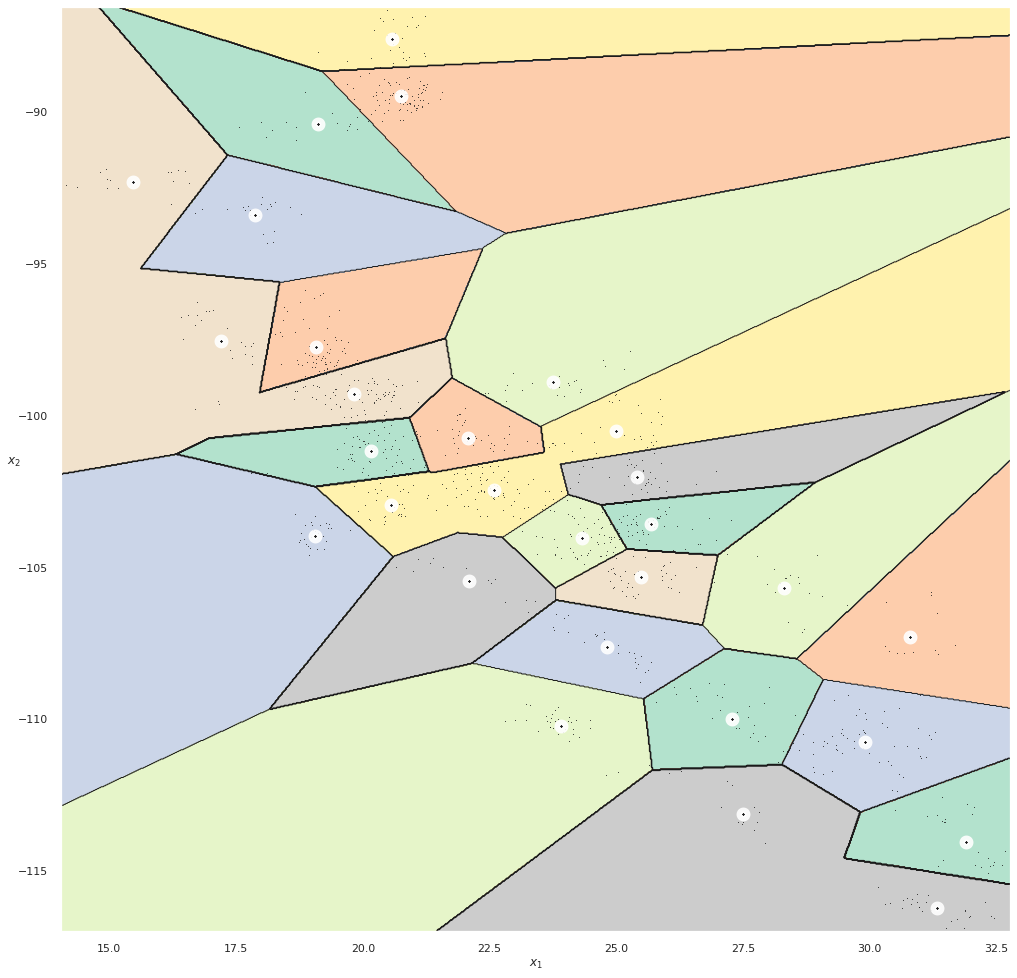

In [433]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='black')
    gax.set_xlabel('longitude')
    gax.set_ylabel('latitude')

    gax.spines['top'].set_visible(False)
    gax.spines['right'].set_visible(False)
    


def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    W=Z

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)


plt.figure(figsize=(17, 17))
plot_decision_boundaries(kmeans30, X2_Coordenadas_blobs)
#plt.plot(world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white'))
plt.show()